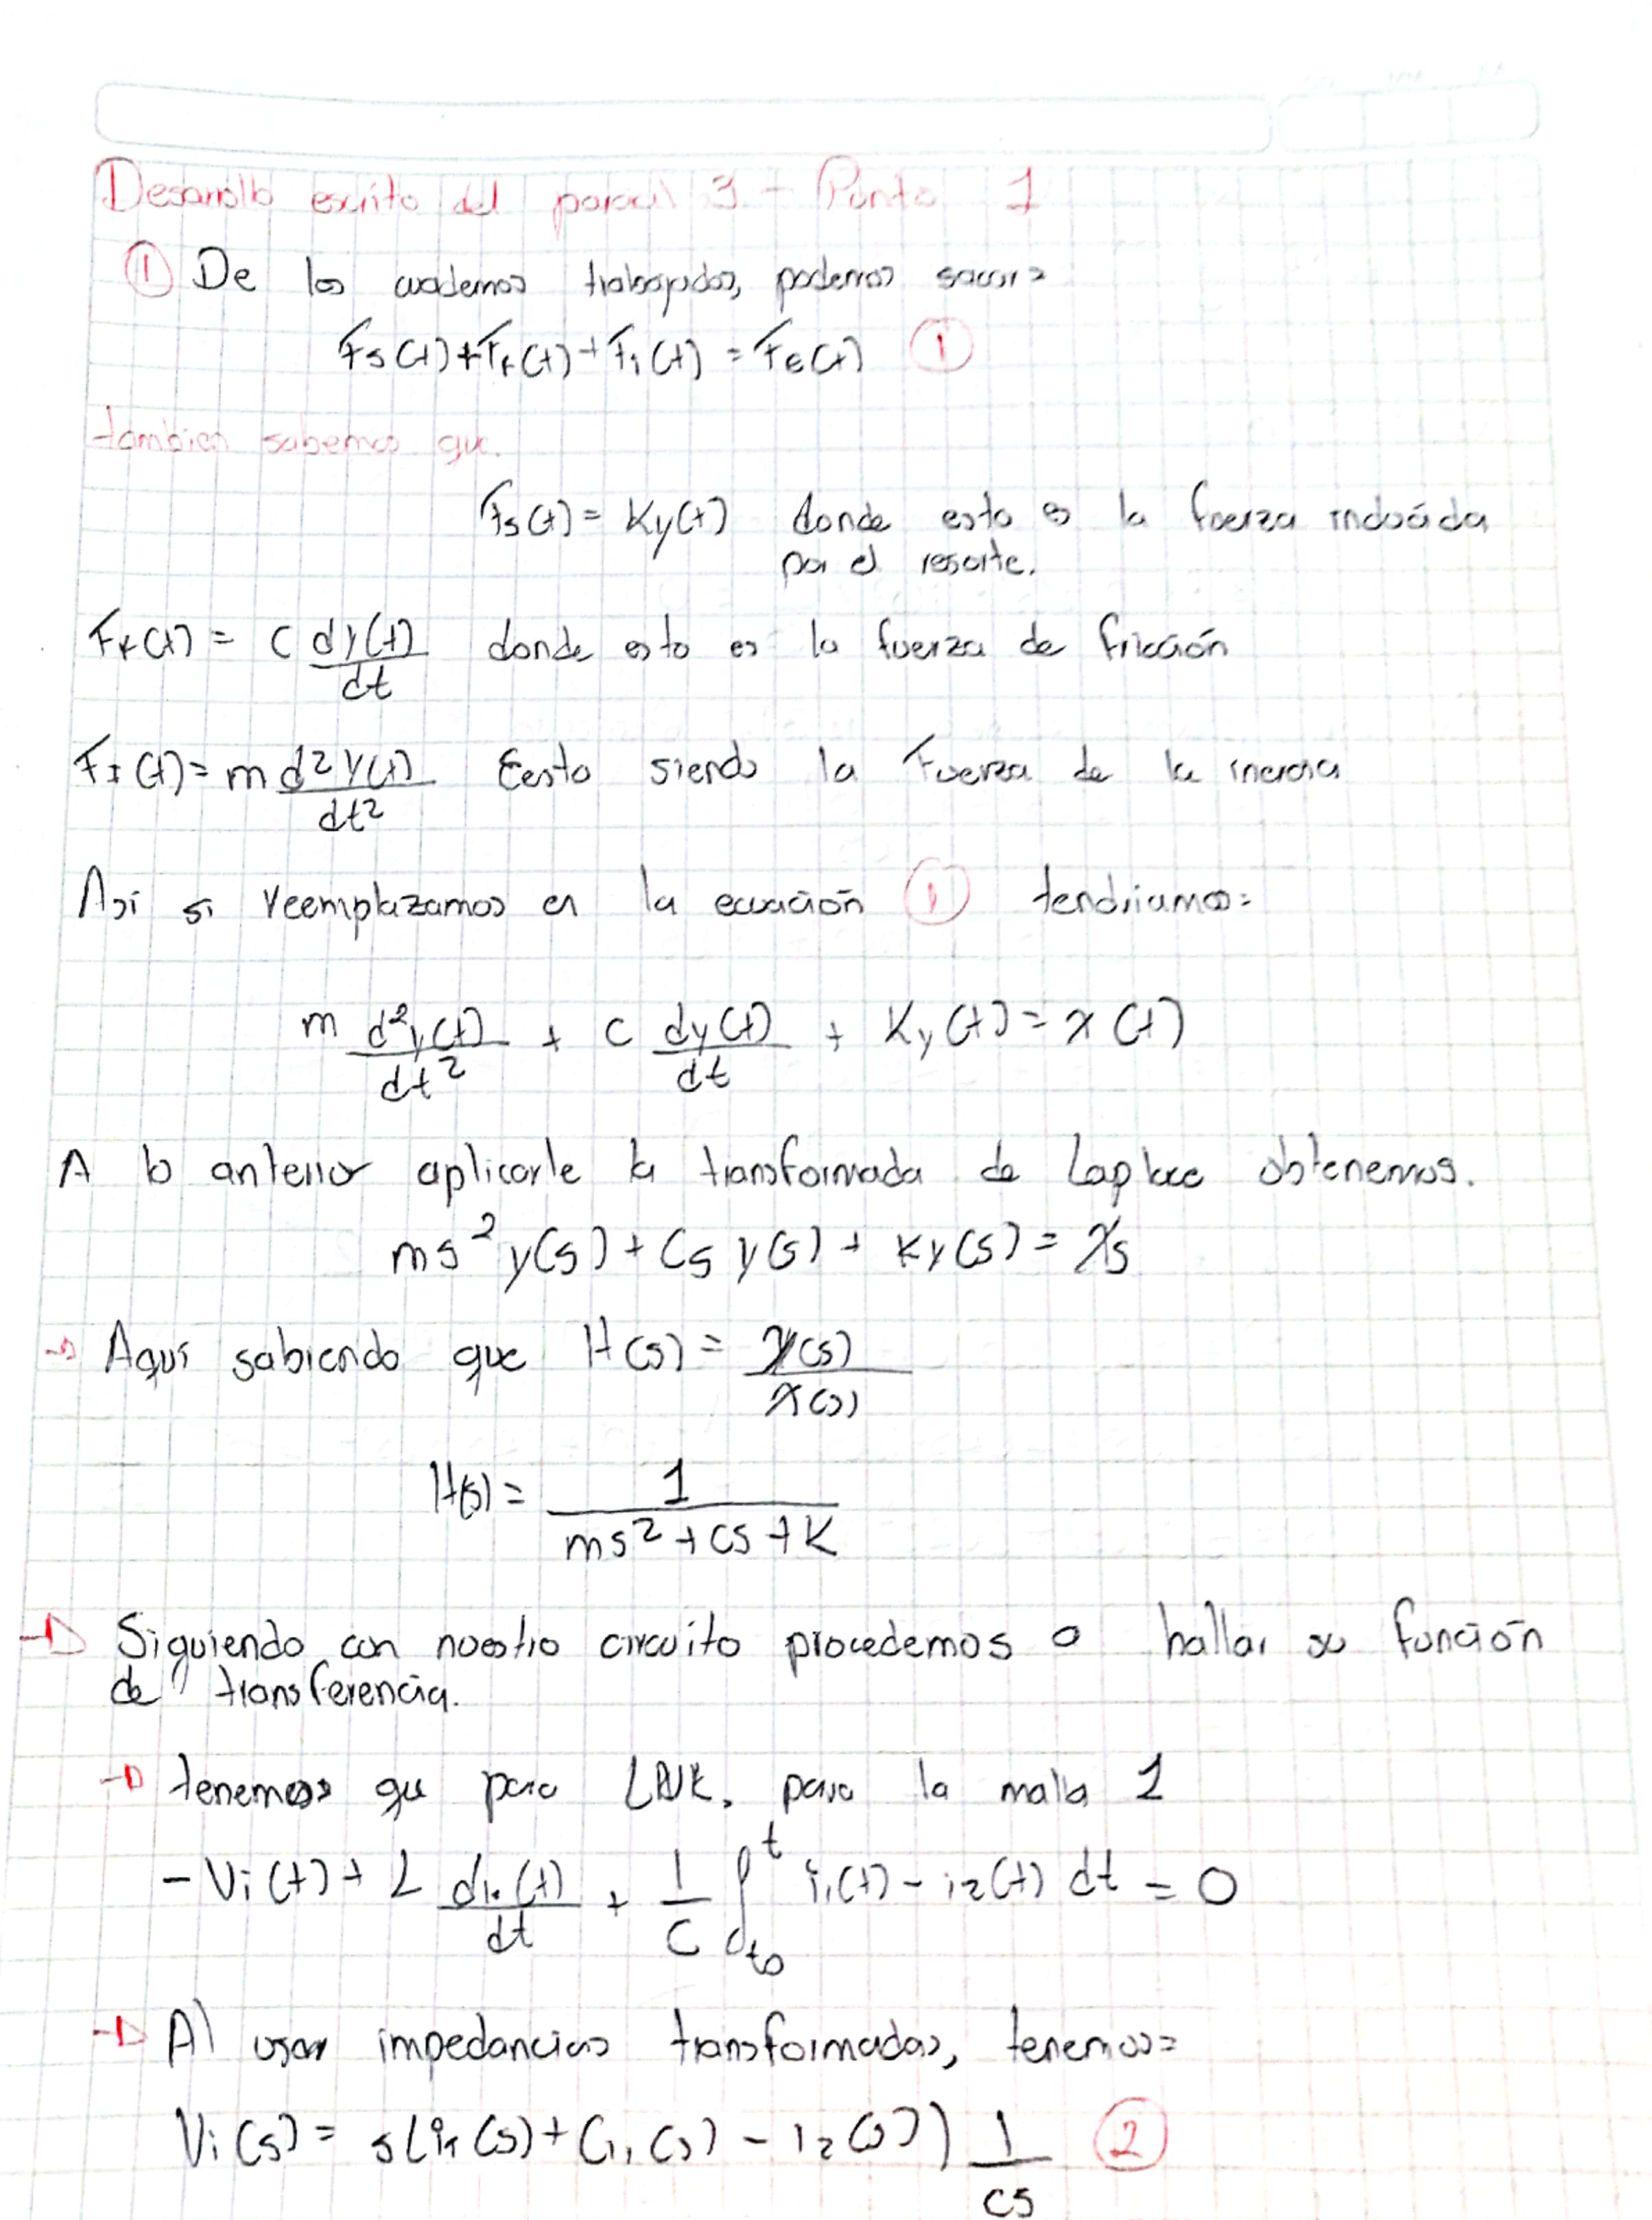

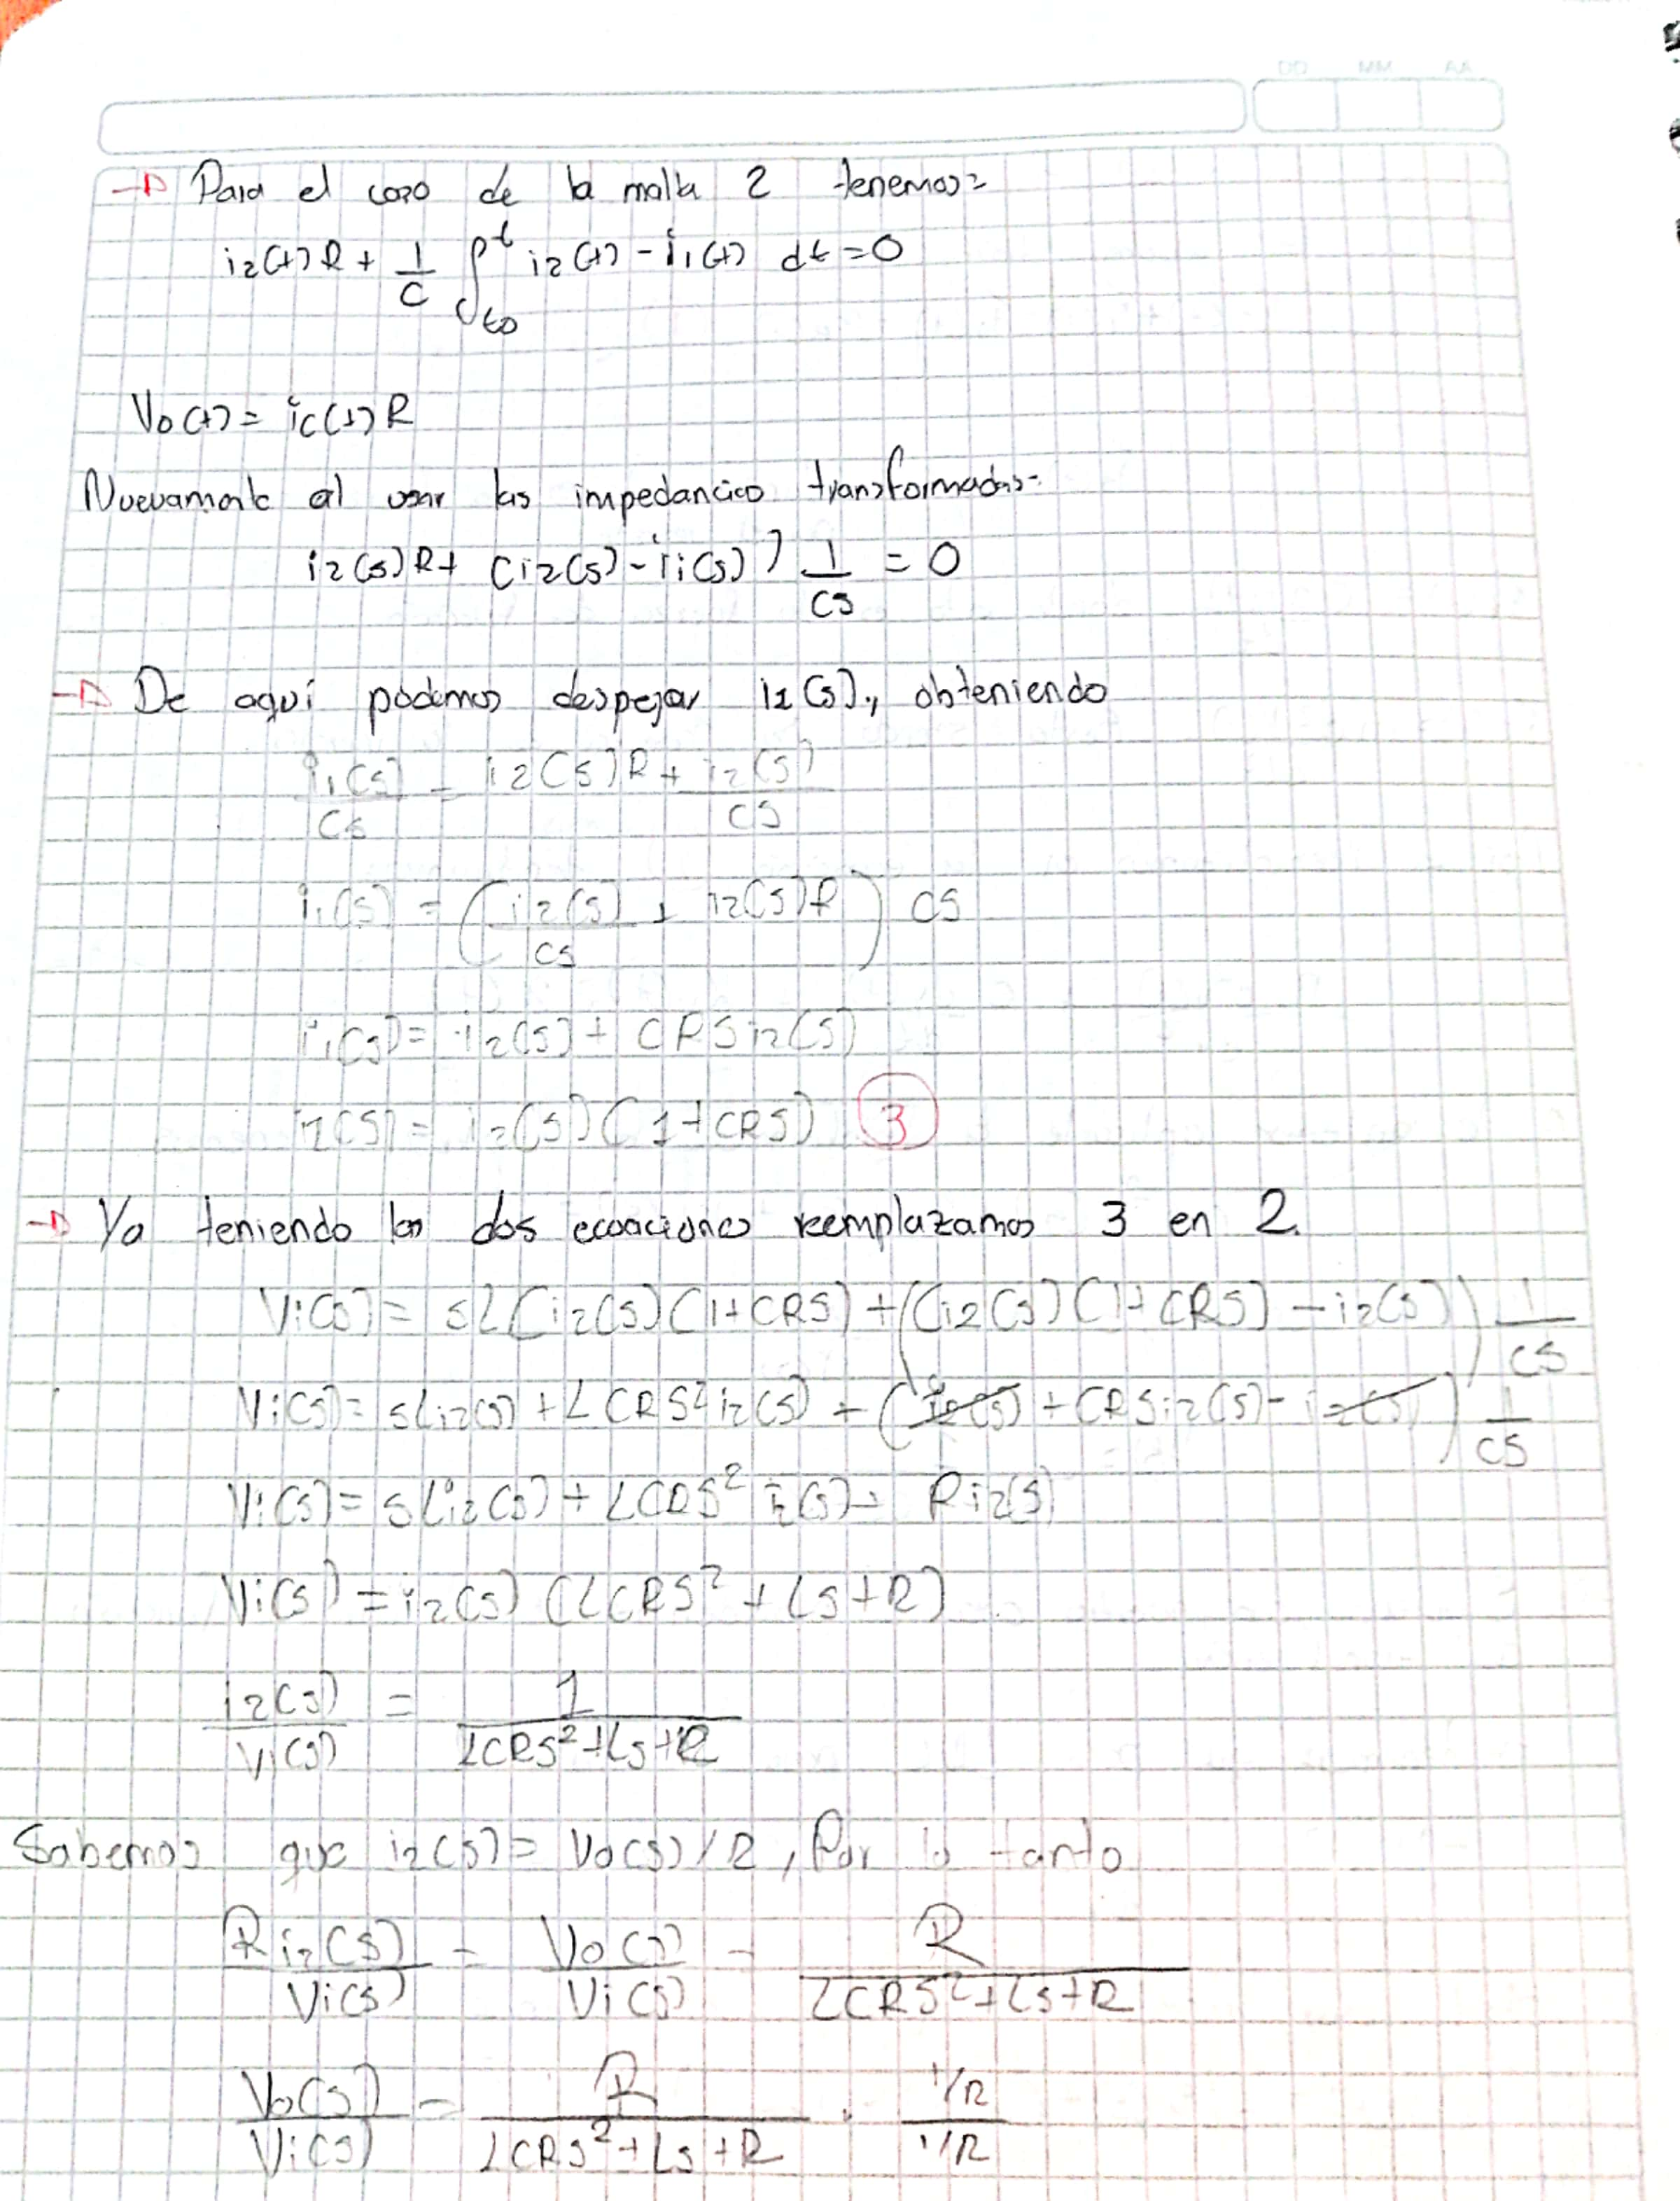

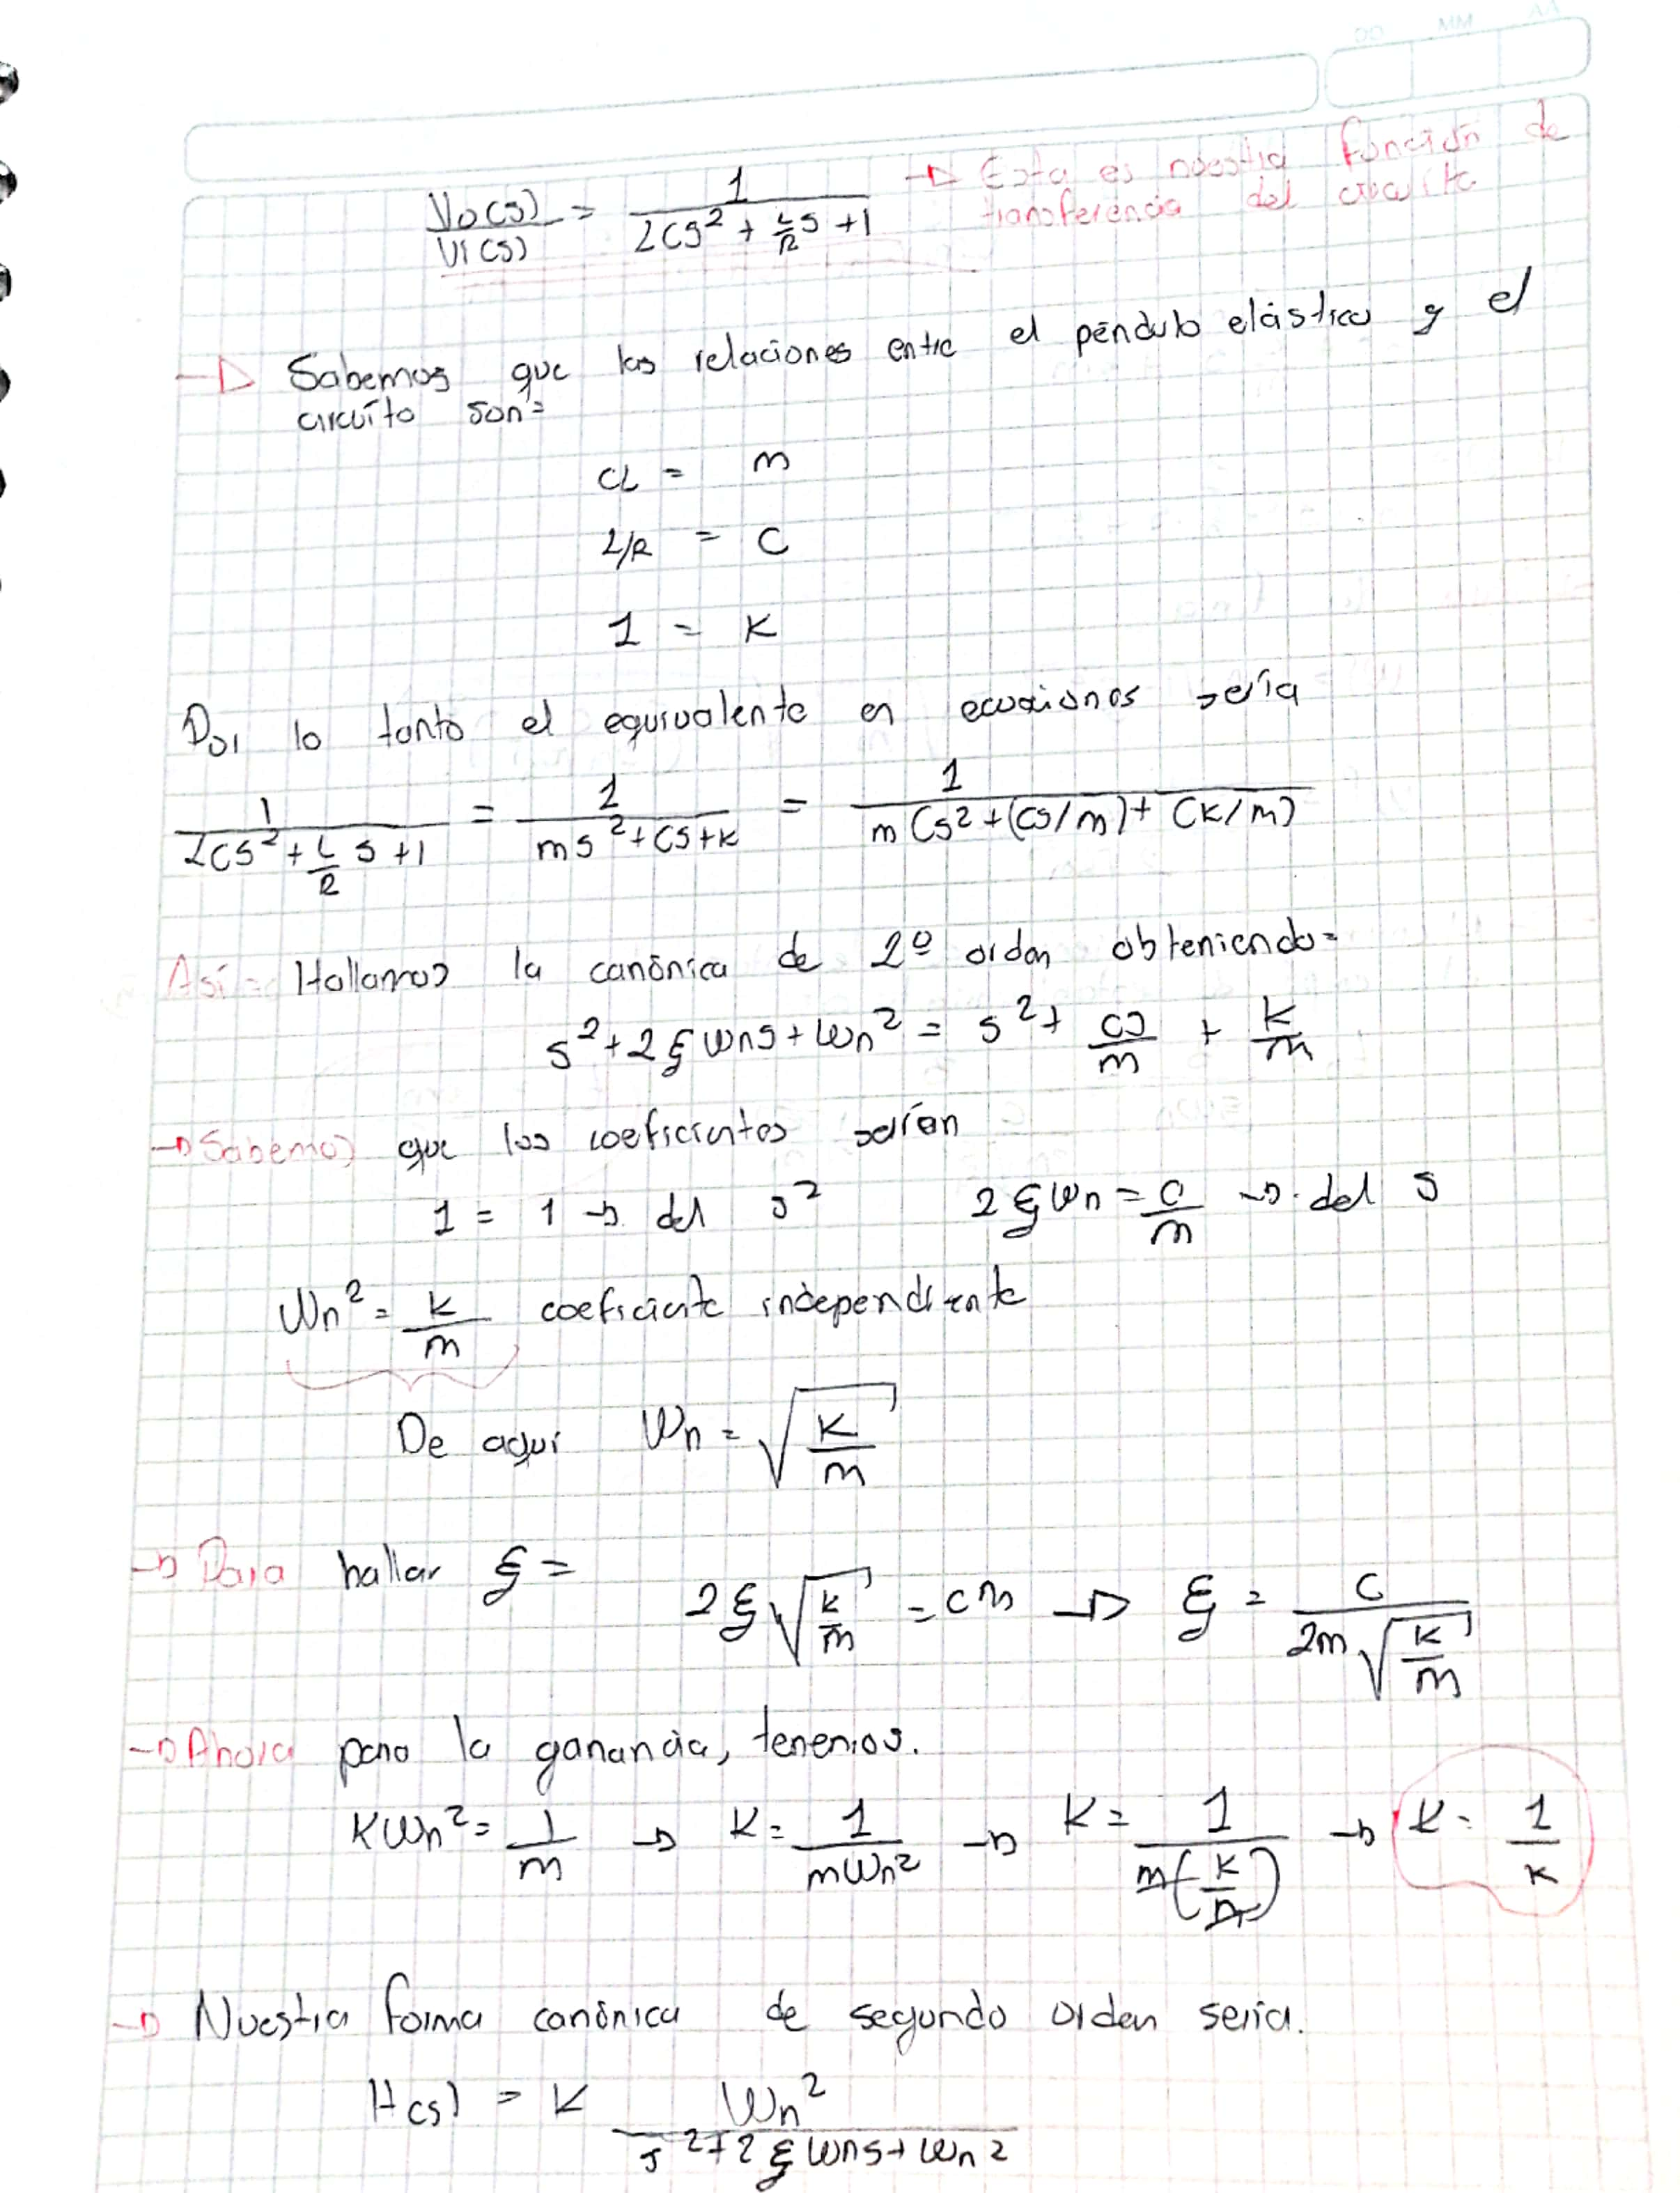

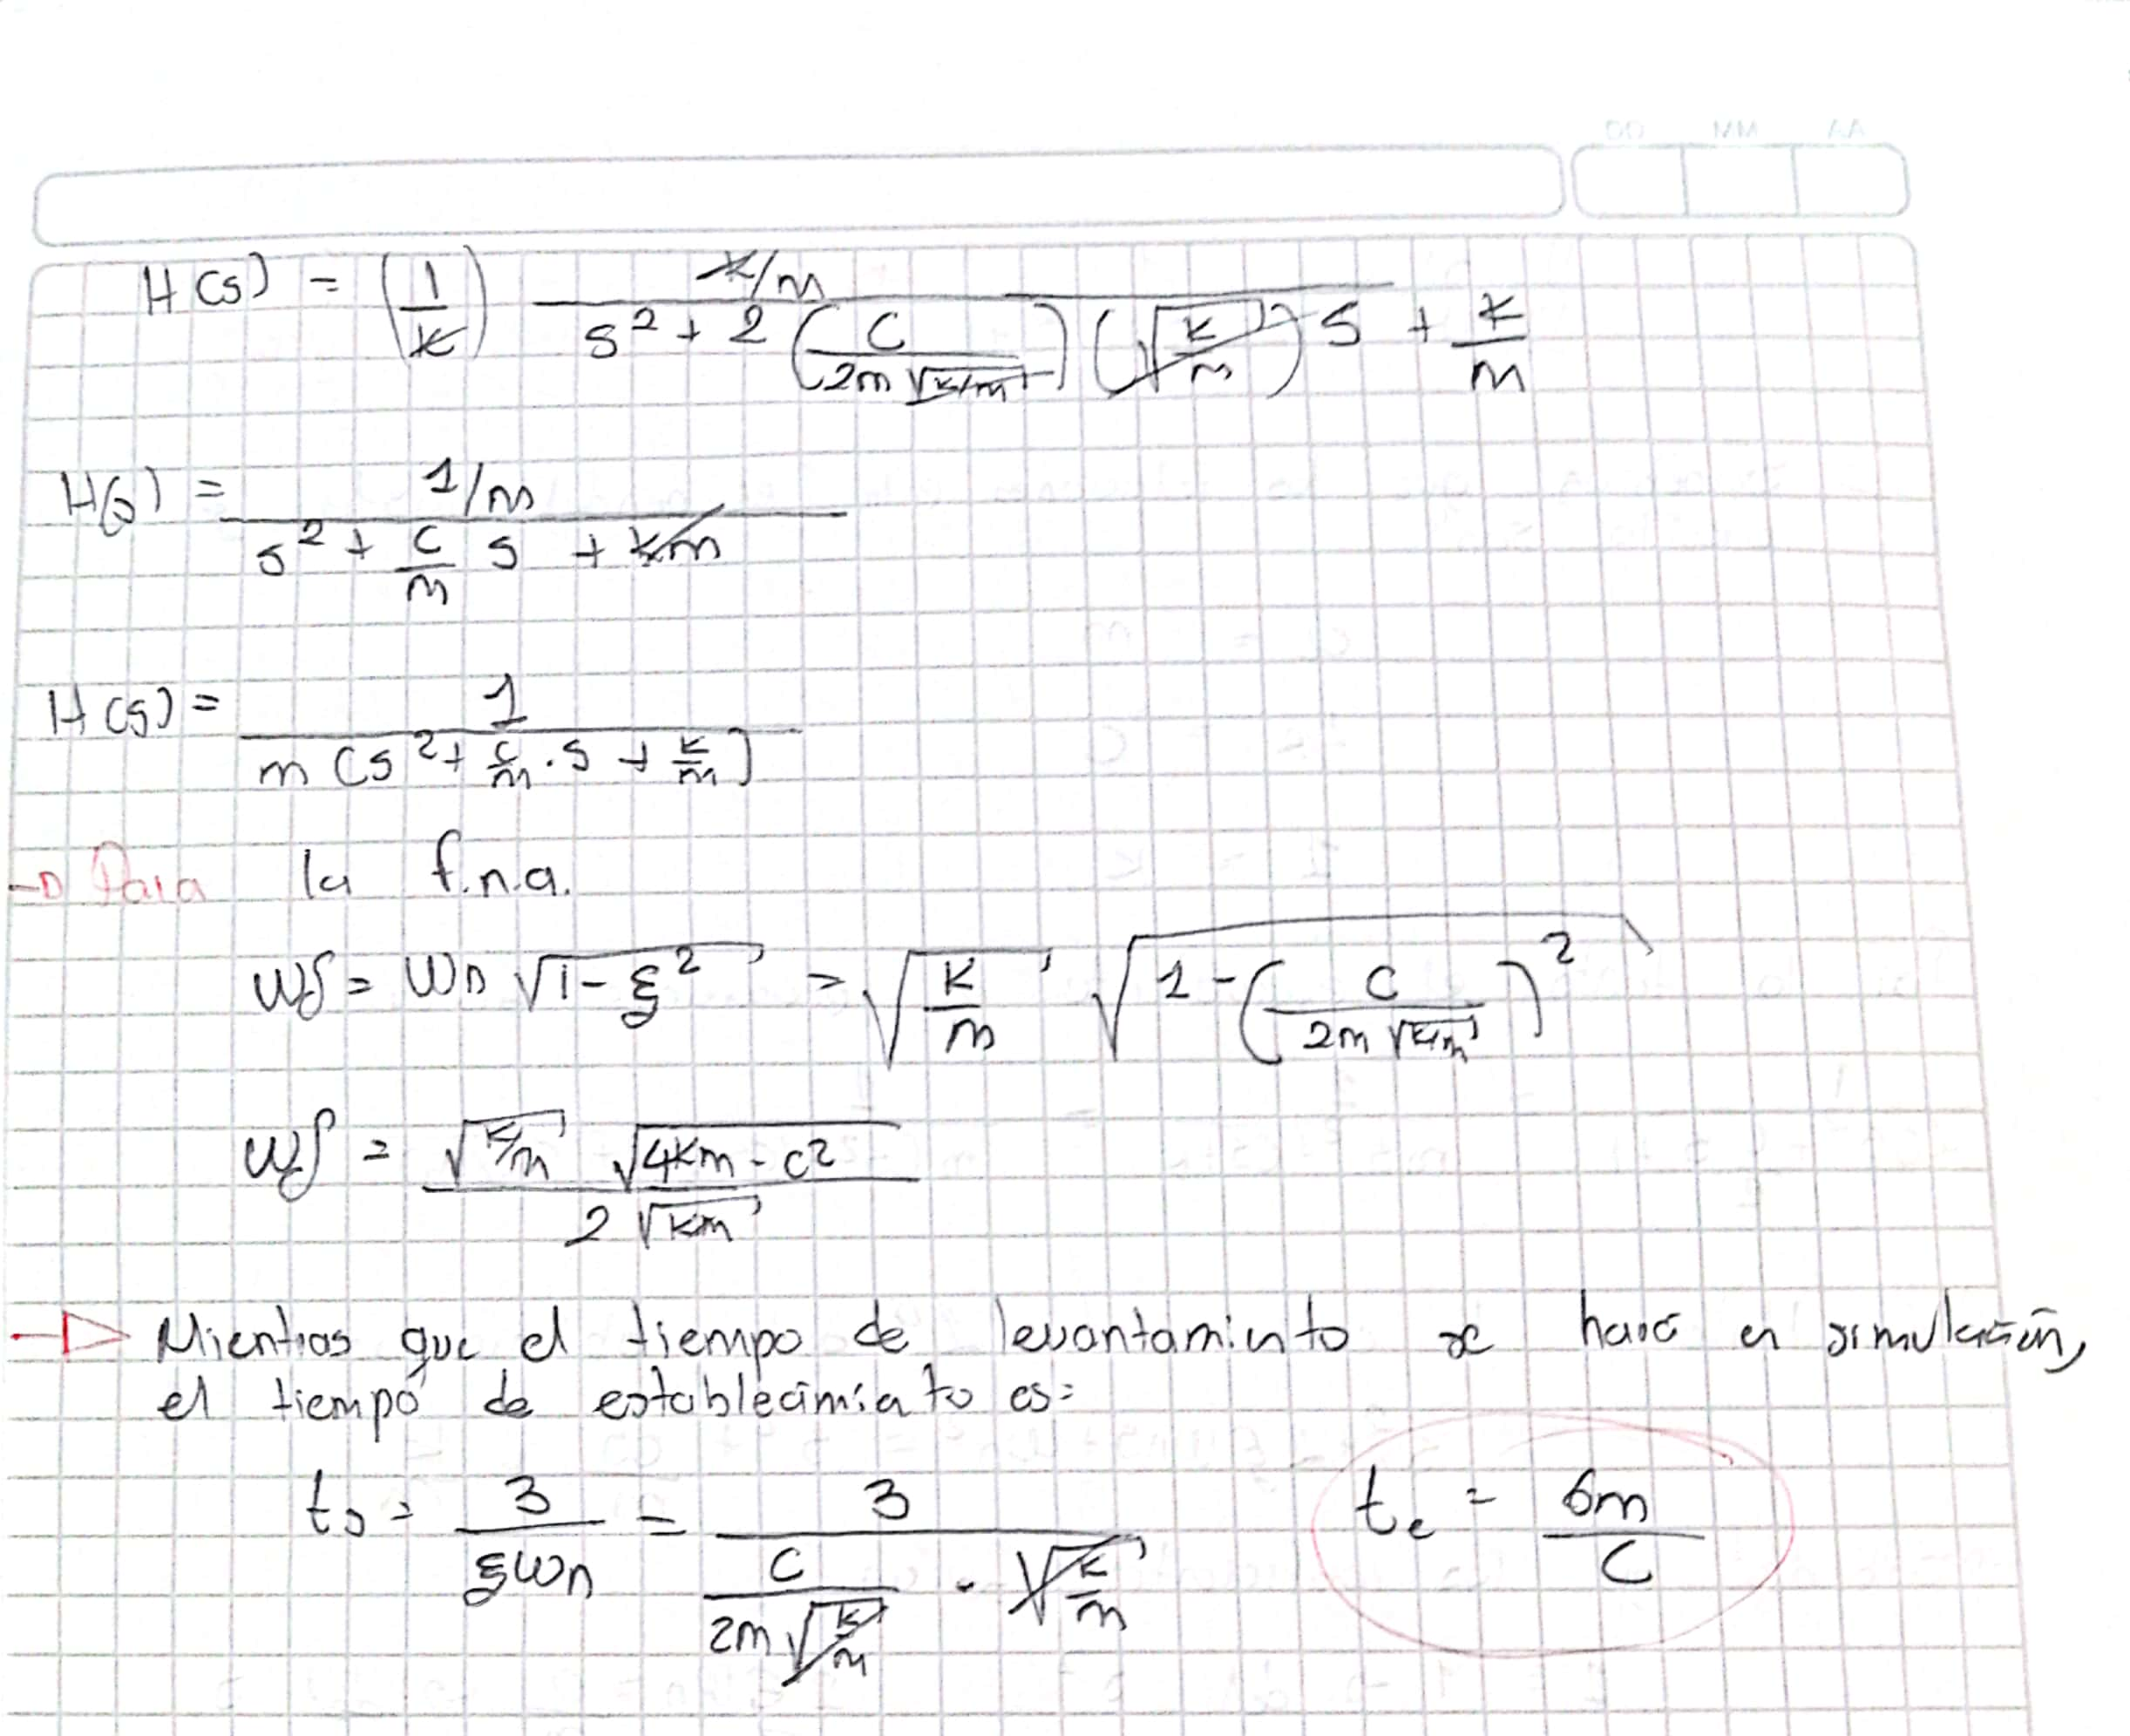

**Por el lado de la simulación la dividiremos en dos partes, siendo la primera:

In [ ]:
!pip install sympy --upgrade #Última versión de sympy

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
sym.init_printing()
#definir variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

De la parte escrita, pudimos obtener que nuestra forma cánonica es:

$$H(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$H(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$

In [ ]:
#Reemplazando nuestra forma cánonica:
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente
Kg = 1/ao #Esta variable sería nuestra ganancia
wn = sym.sqrt(ao/a2)
xi = a1/(2*a2*sym.sqrt(ao/a2))
#función de transferencia
H = Kg*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

In [ ]:
#Para hallar los polos procedemos de la sgt manera
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱      2      
                    ╱      c       
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m                √m            

Sabemos que para un sistema subamortiguado:

$$0<\xi<1$$

$$0<\frac{a_1}{2 a_2 \sqrt{\frac {a_0} {a_2}}}<1$$

$$0<\frac{c}{2 m\sqrt{\frac {k} {m}}}<1$$

por lo tanto asumimos:

$$c=1 = \frac{L}{R}$$

$L = 1$, $R=1$

$$k=1$$

$$m=4 = CL$$

$C=4$

$$\xi = \frac{1}{4}=0.25$$

Para así continuar con nuestro código


In [ ]:
#Tomamos los valores asumidos
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

In [ ]:
#Nuestros polos y ceros serían
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


In [ ]:
#ahora pasamos a encontrar nuestro tiempo de establecimiento en la simulación usando la fórmula obtenida en la parte escrita
t_e = 6*m / c
print('Nuestro tiempo de establecimiento es: ',t_e.subs(mck))

Nuestro tiempo de establecimiento es:  24.0000000000000


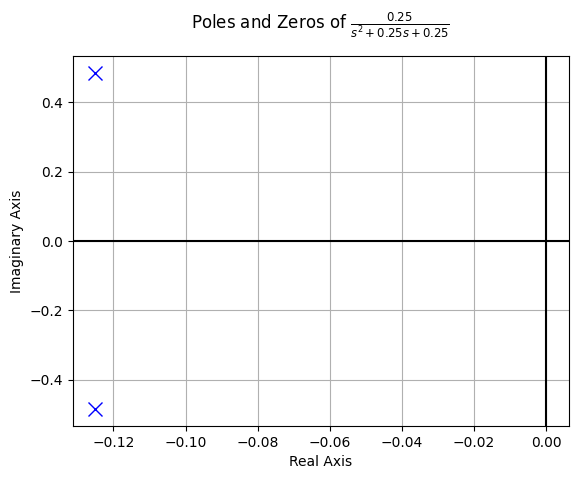

In [ ]:
#de cuadernos anteriores graficamos nuestros polos y ceros

from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(mck))

tf = TransferFunction(num, den, s)#numerados y denominador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf)

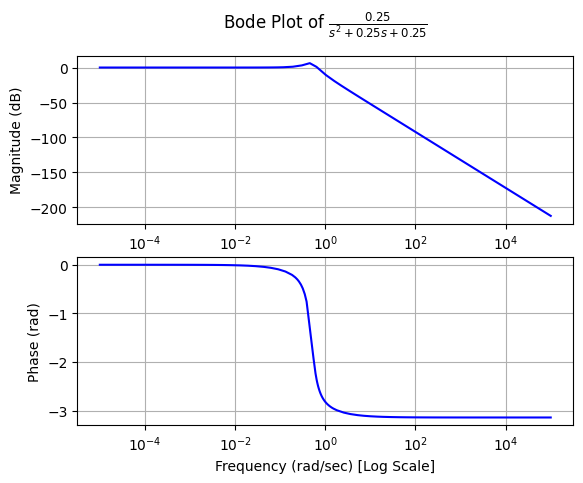

In [ ]:
#Para continuar con los puntos, empezamos haciendo nuestro diagrama de bode de la
#siguiente manera:
bode_plot(tf)

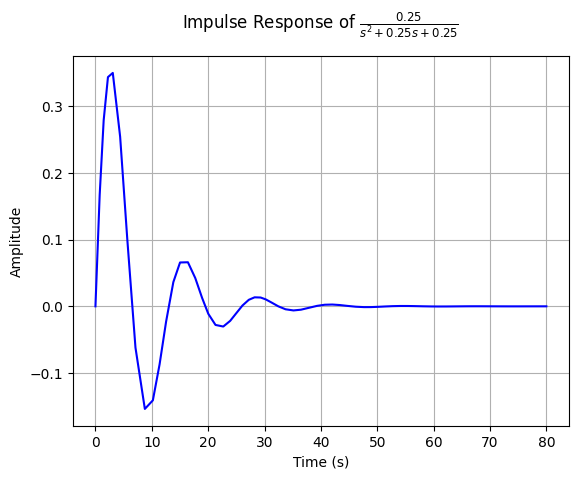

In [ ]:
#en el caso de nuestra respuesta impulso:
impulse_response_plot(tf,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Sabiendo que tf es nuestra función de transferencia


# Definimos la función de transferencia, esto con los valores asumidos anteriormente
numerator = [1]
denominator = [4, 1, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

2.8282828282828287

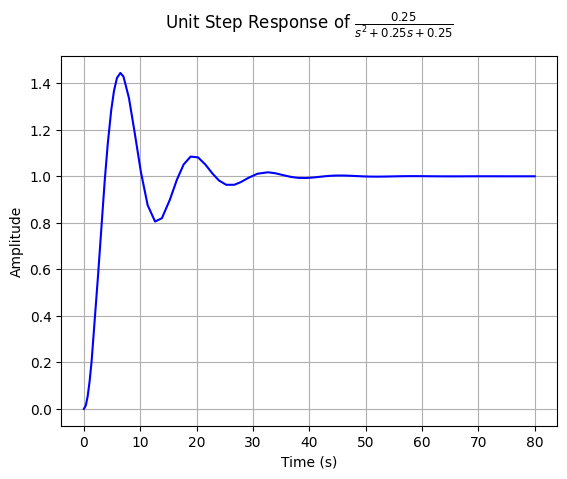

In [ ]:
#Para el caso de la respuesta escalón, tenemos
step_response_plot(tf,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))


In [ ]:
#Realizamos un procedimiento anterior, esta vez para la respuesta escalón
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step, find_peaks
numerator = [1]
denominator = [4, 1, 1]
time, response = step((numerator, denominator))
peaks, _ = find_peaks(response)
Tp = time[peaks[0]]
Tp

6.222222222222223

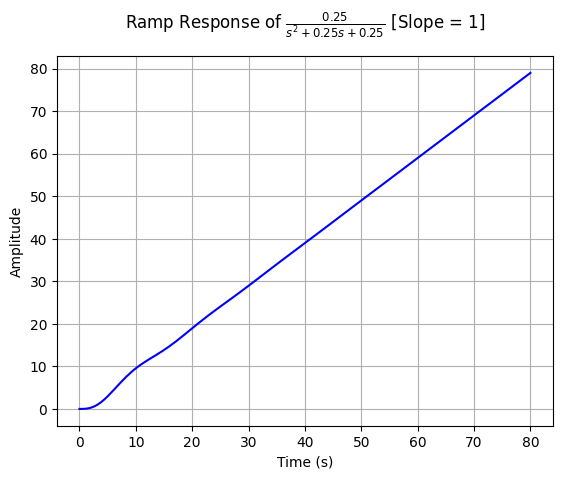

In [ ]:
#finalmente, para este punto tenemos que nuestra respuesta rampa sería
ramp_response_plot(tf,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

# Para la parte de amortiguamiento crítico tenemos que:

$$\xi=1$$

$$\frac{a_1}{2 a_2 \sqrt{\frac {a_0} {a_2}}}=1$$

$$\frac{c}{2 m\sqrt{\frac {k} {m}}}=1$$

Asumimos:

$$c=2 = \frac{L}{R}$$

$L = 2$, $R=1$

$$k=1$$

$$m=1 = CL$$

$C=\frac{1}{2}$

$$\xi = \frac{2}{2}=1$$

In [ ]:
#polos y ceros
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                             ___________________
                            ╱         2         
                _______    ╱         c          
        1.0⋅ⅈ⋅╲╱ k + 1 ⋅  ╱   - ─────────── + 1 
   c                    ╲╱      4⋅m⋅(k + 1)     
- ─── + ────────────────────────────────────────
  2⋅m                      √m                   

In [ ]:
#Reemplazando los valores
mck = {m: 1.0, c: 2.0, k: 1.0}
mck

{c: 2.0, k: 1.0, m: 1.0}

In [ ]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.0 + 1.0*I
p2= -1.0 - 1.0*I
xi= 0.707106781186548
omega_n= 1.41421356237310


In [ ]:
t_e1 = 6*m / c
print('El tiempo de establecimiento para este caso es de: ',t_e1.subs(mck))

El tiempo de establecimiento para este caso es de:  3.00000000000000


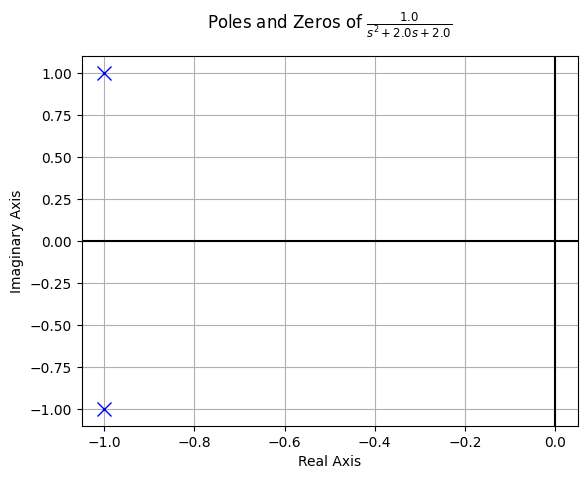

In [ ]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

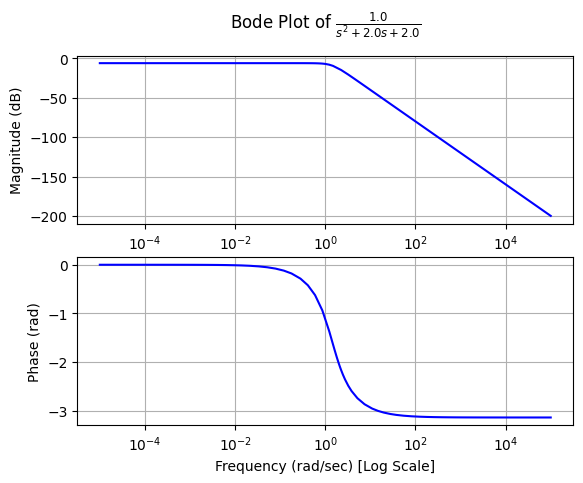

In [ ]:
#Realizamos nuevamente los procesos de las gráficas caso de Bode
bode_plot(tf1)

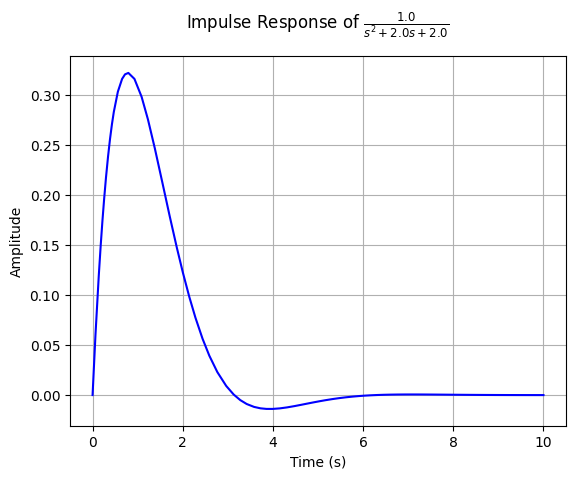

In [ ]:
#Caso de respuesta impulso
impulse_response_plot(tf1,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks
#Repetimos procedimientos
numerator = [1]
denominator = [1, 2, 1]
time, response = impulse((numerator, denominator))
peaks, _ = find_peaks(response)
Tp = time[peaks[0]]
Tp

0.9898989898989898

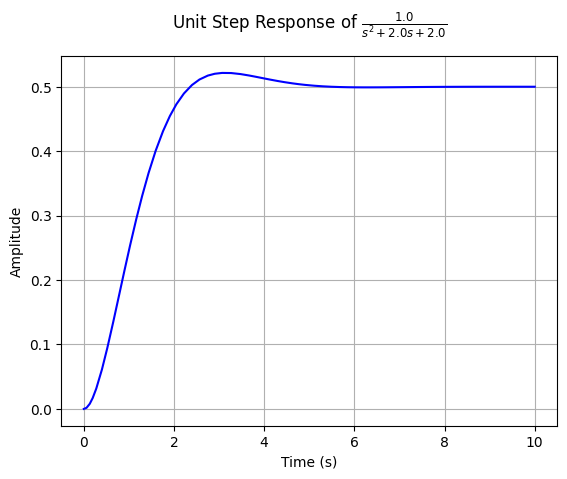

In [ ]:
#Para el caso de la respuesta escalón
step_response_plot(tf1,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

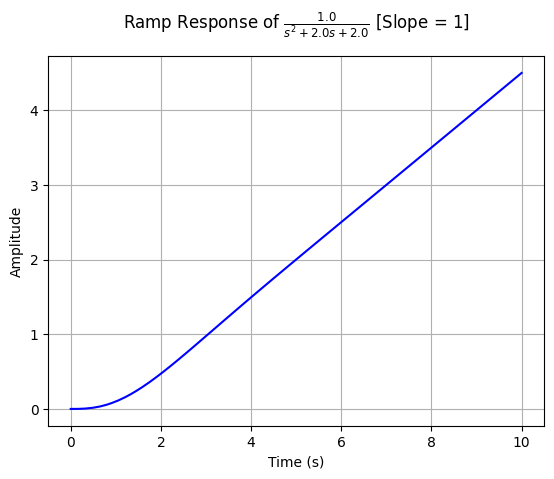

In [ ]:
#Para el caso de la respuesta rampa
ramp_response_plot(tf1,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

# Para hallar nuestra función de transferencia para la masa resorte amortiguada en lazo cerrado procedemos:

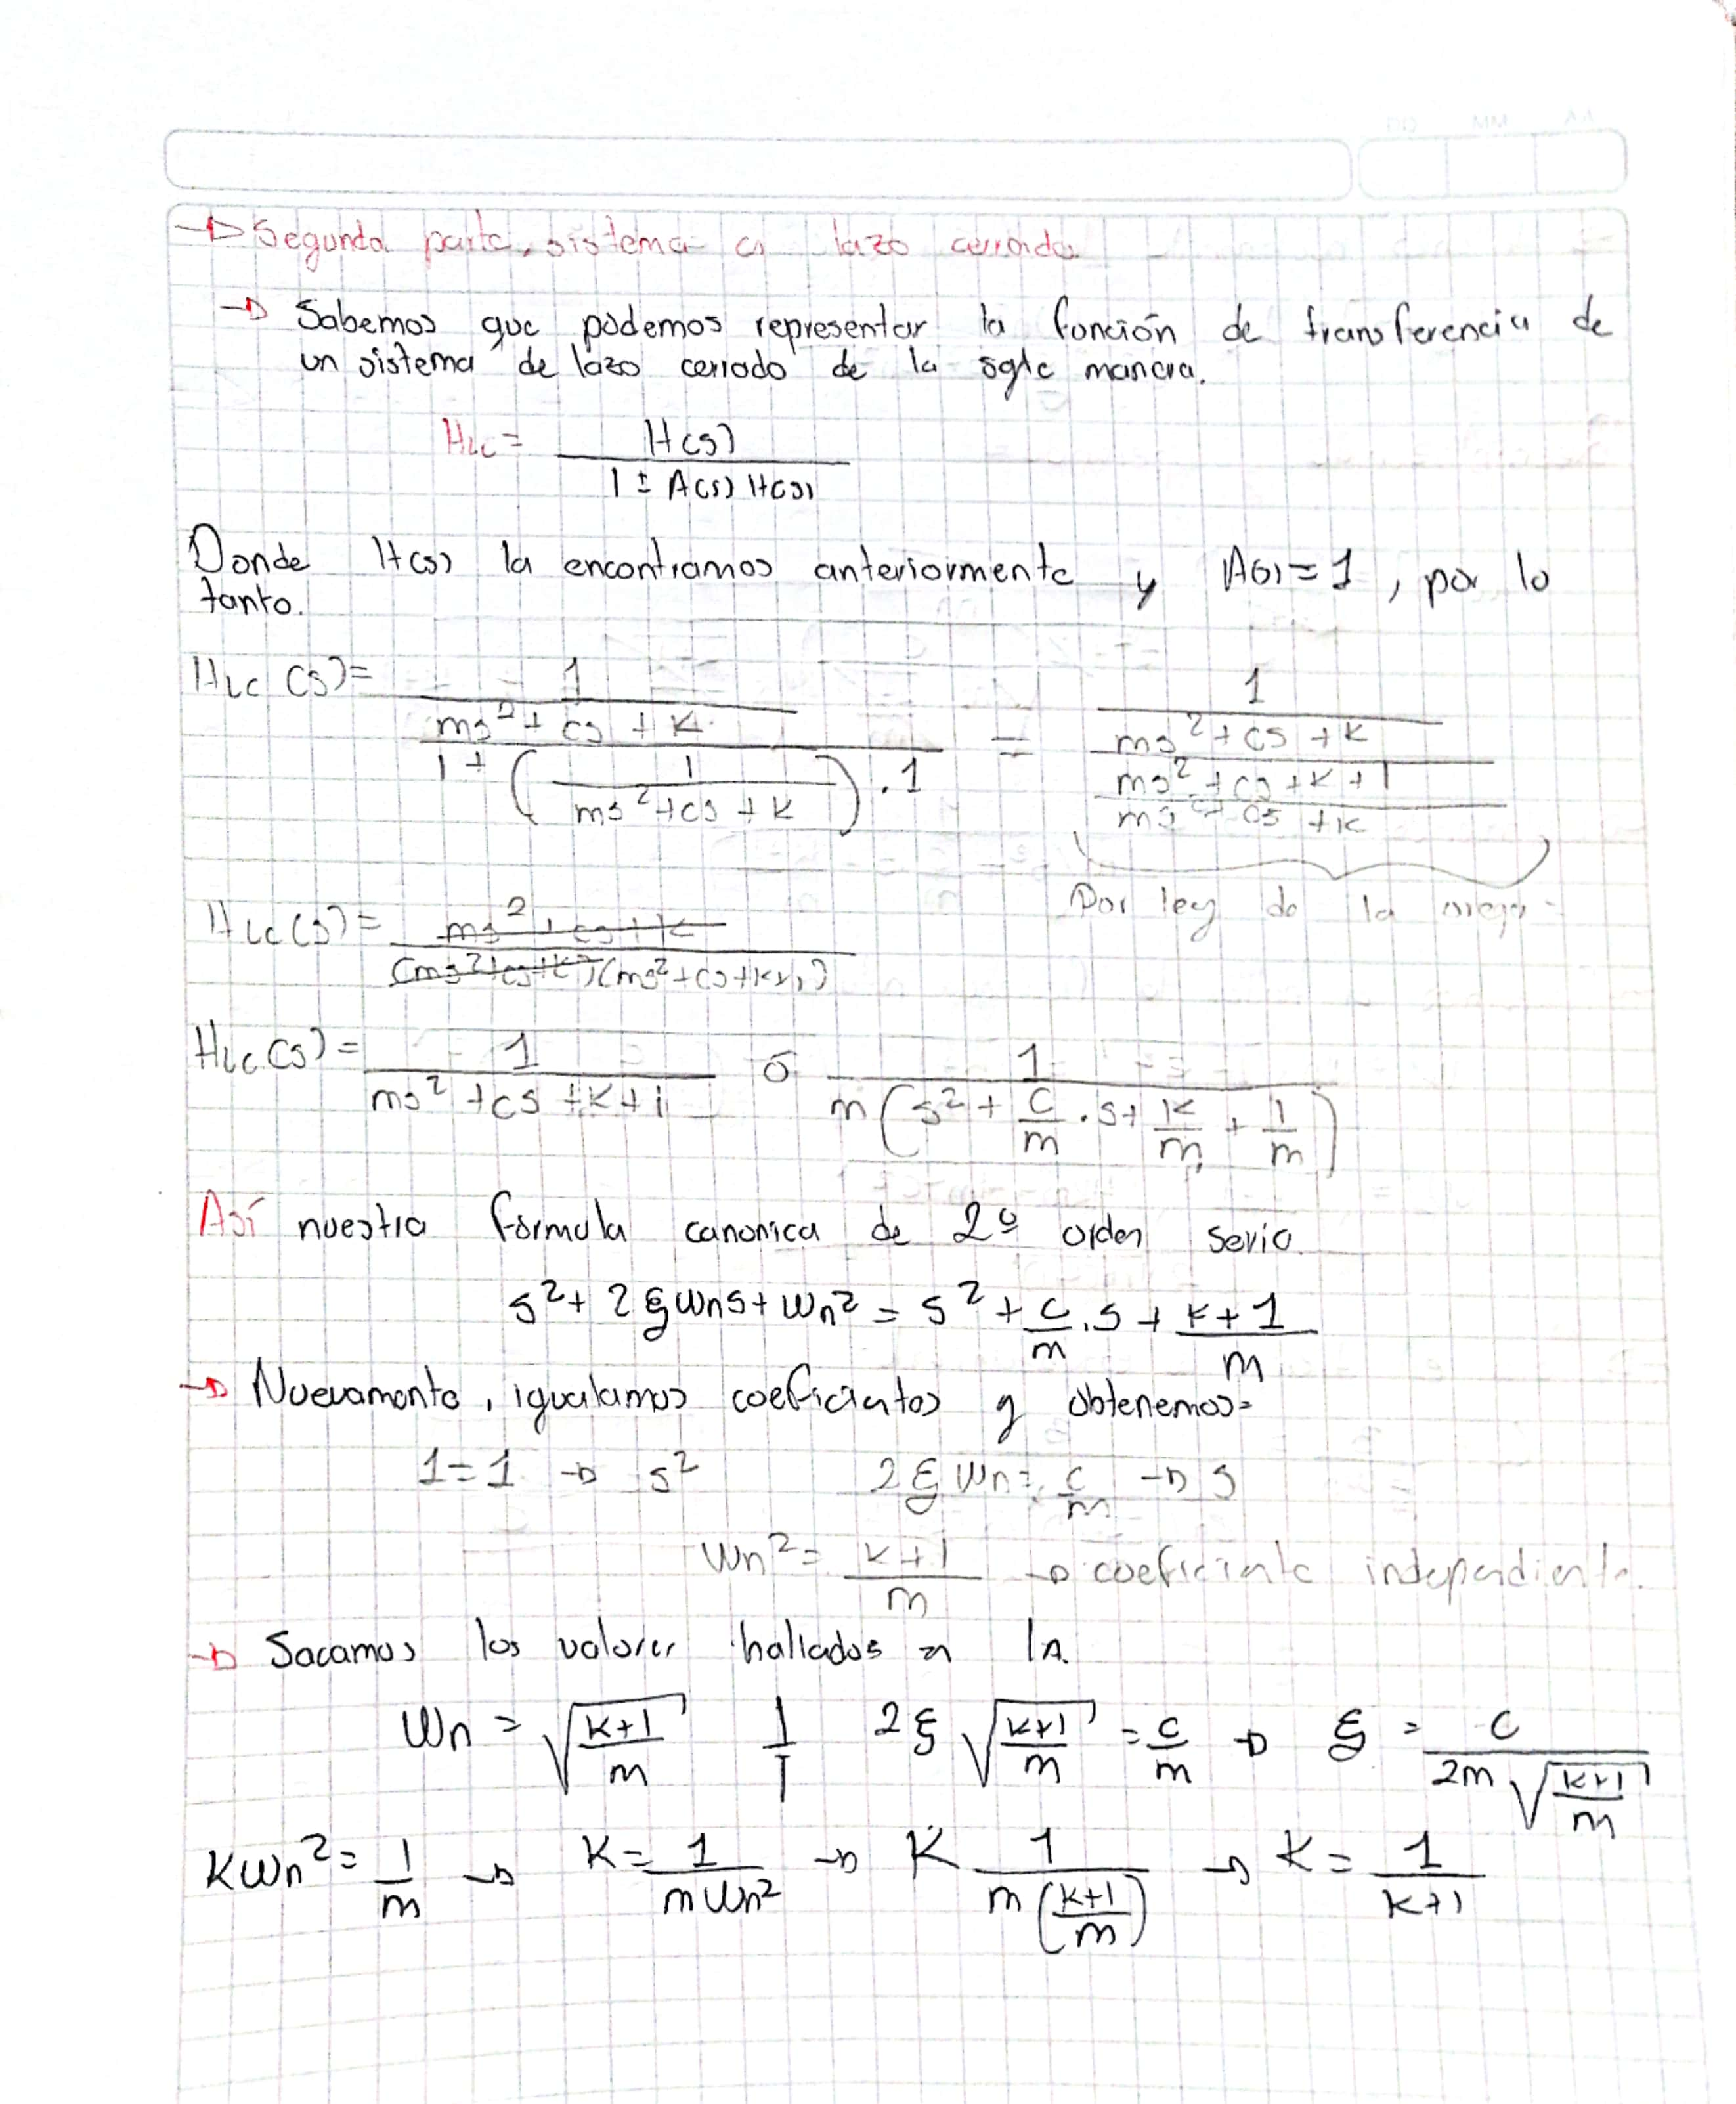

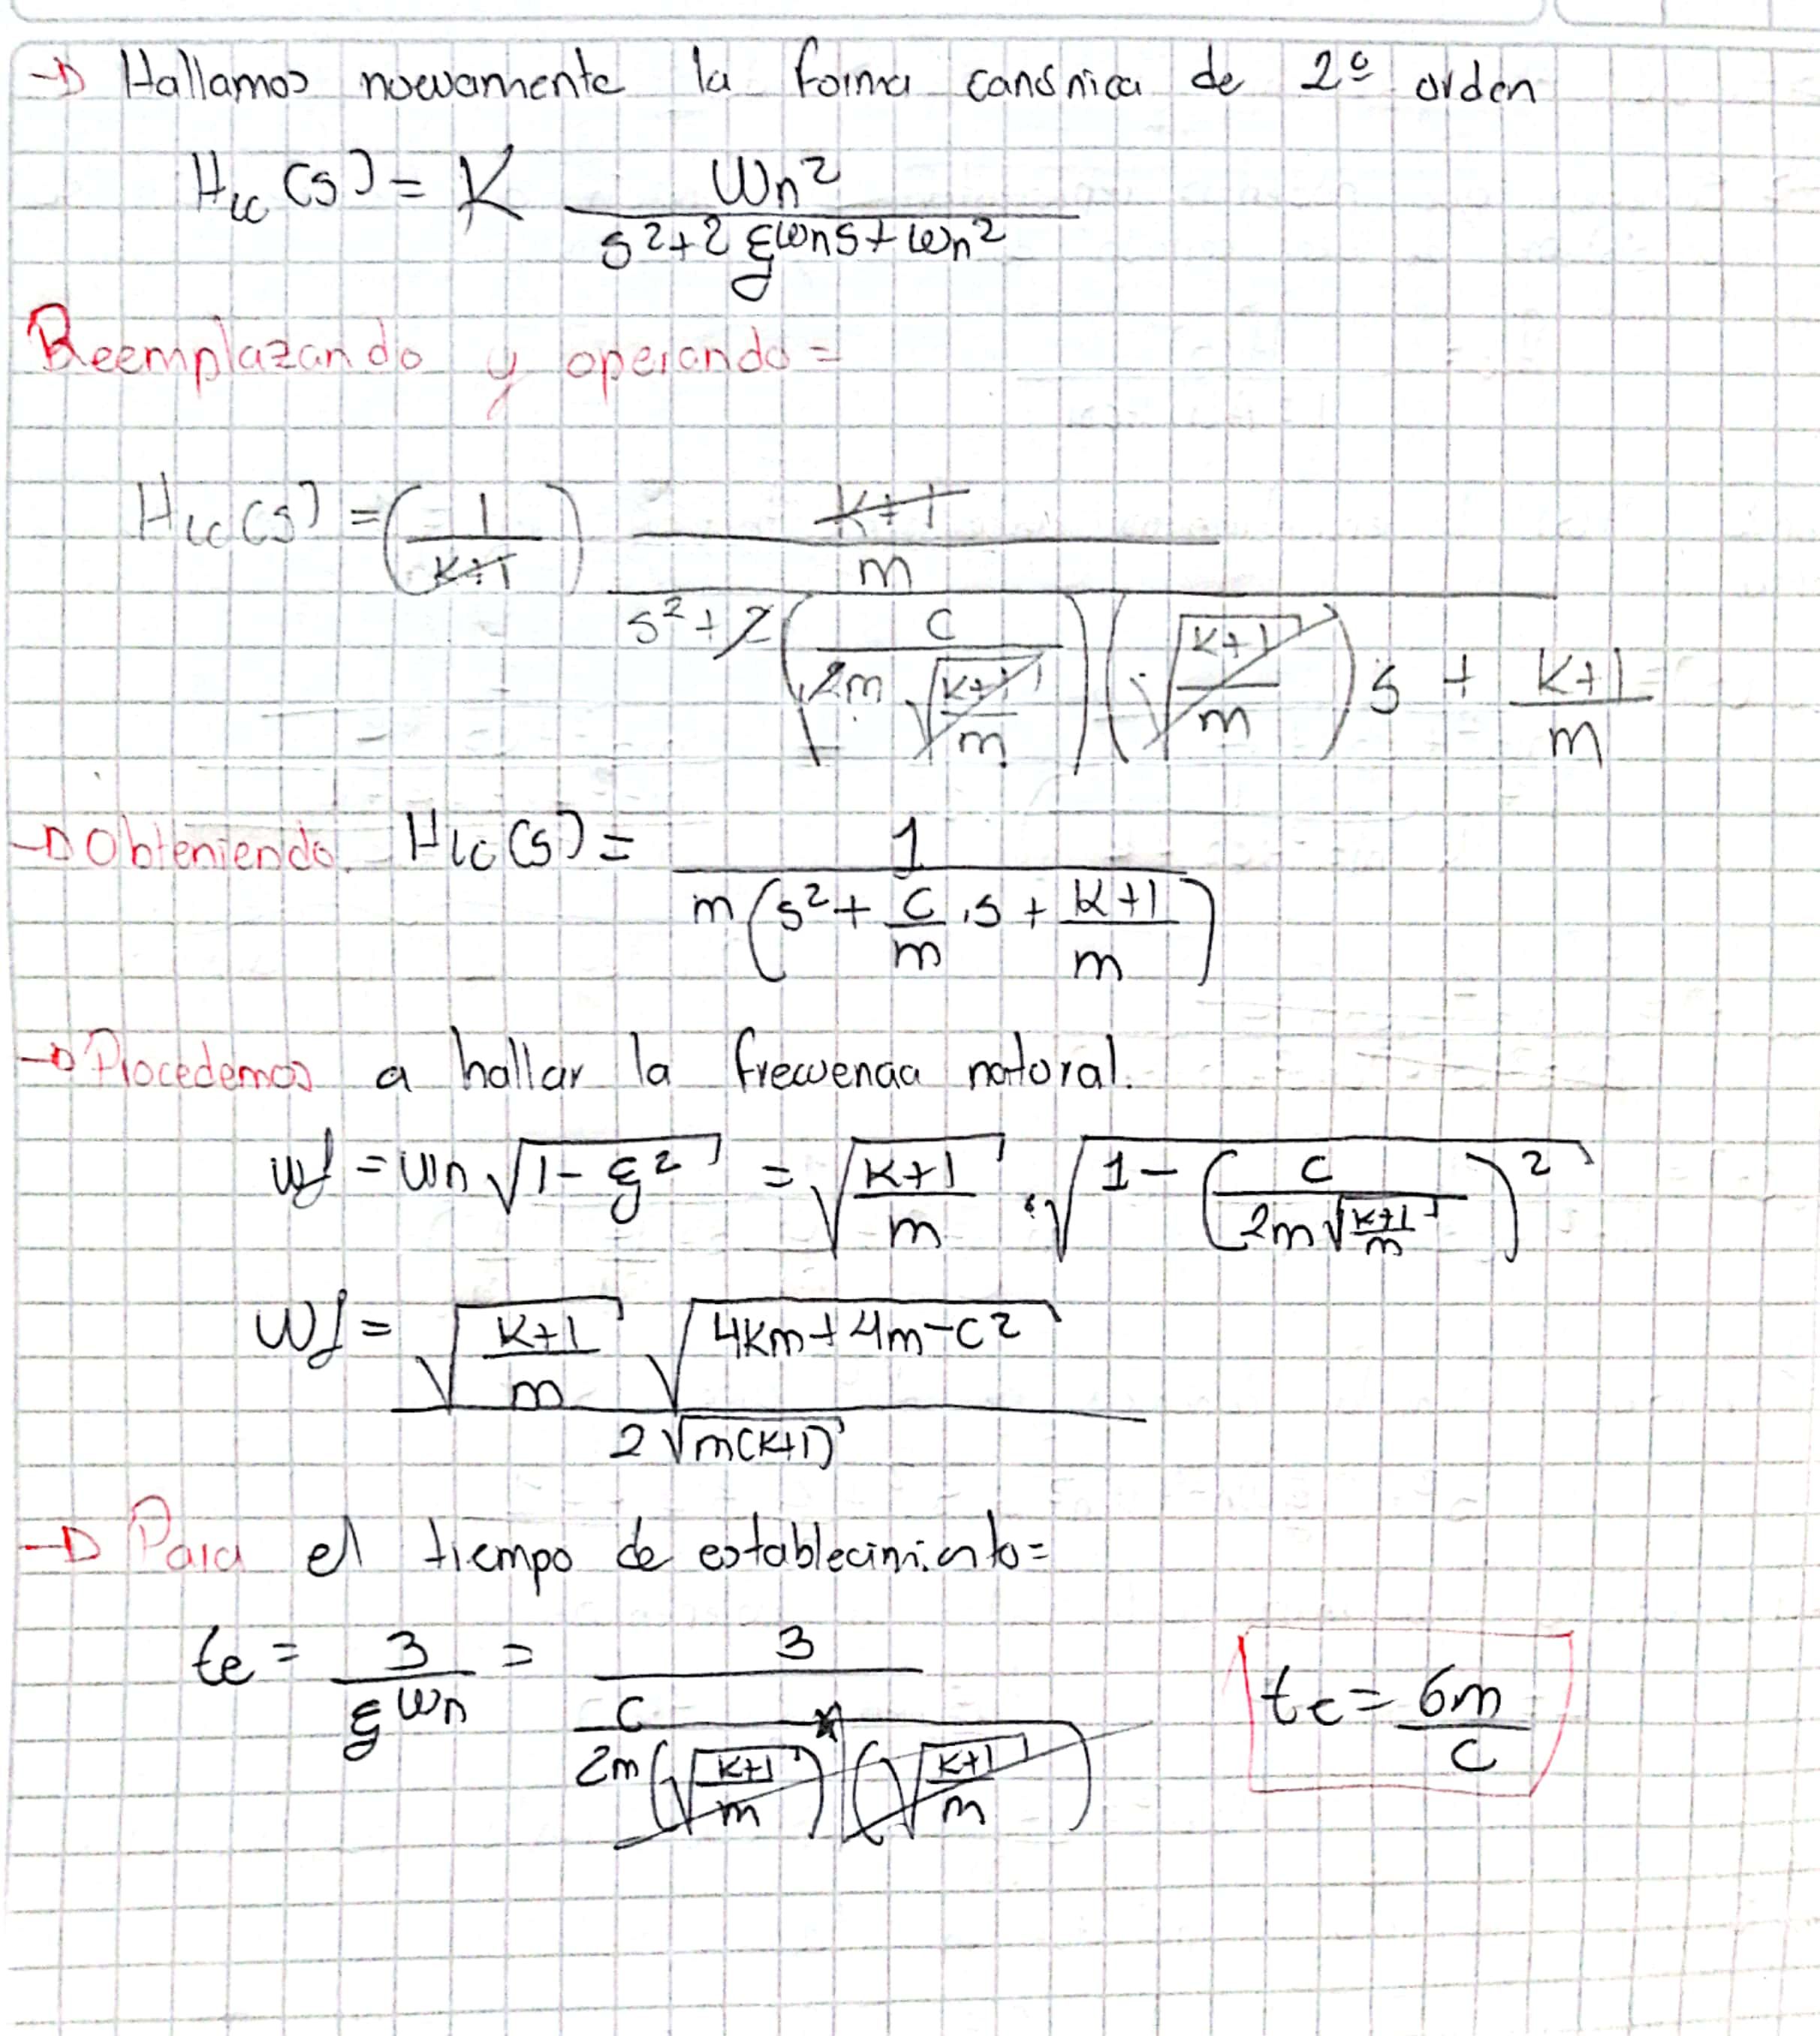

Nuevamente, teniendo en cuenta la forma canónica:

$$HLC(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$HLC(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$

In [ ]:
#Reemplazando nuestra forma cánonica:
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k+1 # 1 en circuito equivalente
Kg = 1/ao #Esta variable sería nuestra ganancia
wn = sym.sqrt(ao/a2)
xi = a1/(2*a2*sym.sqrt(ao/a2))
#función de transferencia
H = Kg*wn**2/(s**2+2*xi*wn*s+wn**2)
H

         1          
────────────────────
  ⎛c⋅s    2   k + 1⎞
m⋅⎜─── + s  + ─────⎟
  ⎝ m           m  ⎠

In [ ]:
#calculamos nuevamente los polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                             ___________________
                            ╱         2         
                _______    ╱         c          
        1.0⋅ⅈ⋅╲╱ k + 1 ⋅  ╱   - ─────────── + 1 
   c                    ╲╱      4⋅m⋅(k + 1)     
- ─── + ────────────────────────────────────────
  2⋅m                      √m                   

Nuevamente para el sistema subamortiguado.

$$0<\xi<1$$

$$0<\frac{c}{2 m\sqrt{\frac{k+1} {m}}}<1$$

Asumimos:

$$c=1 = \frac{L}{R}$$

$L = 1$, $R=1$

$$k=1$$

$$m=4 = CL$$

$C=4$

$$\xi = \frac{\sqrt{2}}8 =0.17$$

In [ ]:
#Repetimos codigos anteriores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

In [ ]:
#Nuevamente para polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.695970545353753*I
p2= -0.125 - 0.695970545353753*I
xi= 0.176776695296637
omega_n= 0.707106781186548


In [ ]:
t_e3 = 6*m / c
print('Nuestro nuevo tiempo de establecimiento es de: ',t_e3.subs(mck))

Nuestro nuevo tiempo de establecimiento es de:  24.0000000000000


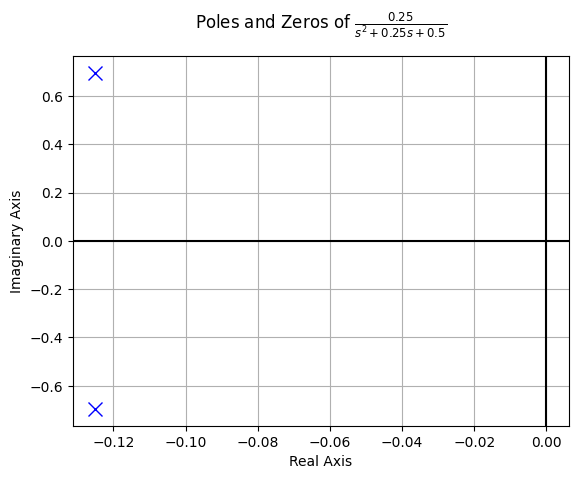

In [ ]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf2 = TransferFunction(num, den, s)#numerador y denominador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf2)

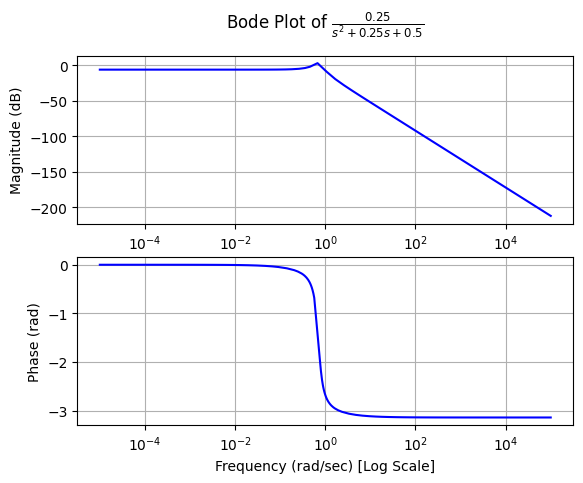

In [ ]:
#desde este punto vamos a repetir código pero con este caso especifico empezando por Bode
bode_plot(tf2)

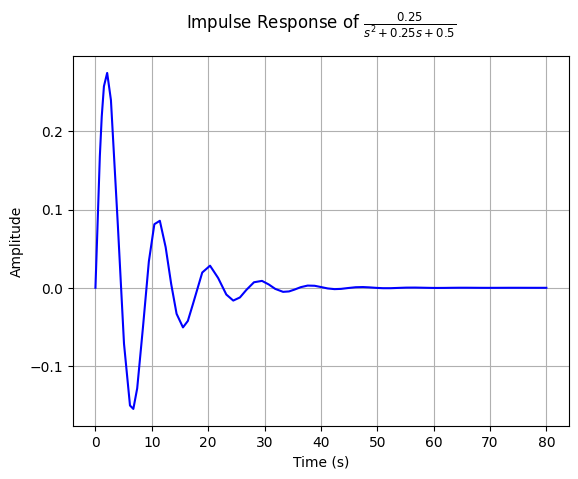

In [ ]:
#Nuevamente para respuesta impulso
impulse_response_plot(tf2,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks
numerator = [1]
denominator = [4, 1, 2]
time, response = impulse((numerator, denominator))
peaks, _ = find_peaks(response)
Tp = time[peaks[0]]
Tp

2.262626262626263

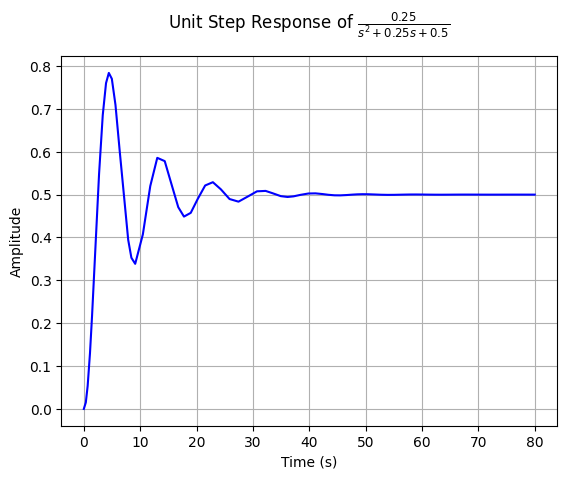

In [ ]:
#Respuesta escalón
step_response_plot(tf2,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step, find_peaks
numerator = [1]
denominator = [4, 1, 2]
time, response = step((numerator, denominator))
peaks, _ = find_peaks(response)
Tp = time[peaks[0]]
Tp

4.525252525252526

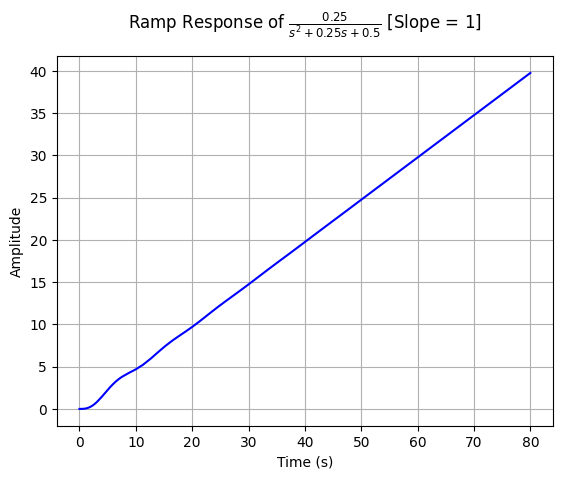

In [ ]:
#Para el caso de la respuesta rampa
ramp_response_plot(tf2,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

#Empezamos nuevamente pero para el caso de amortiguamiento crítico
$$\xi=1$$

$$\frac{c}{2 m\sqrt{\frac{k+1} {m}}}=1$$

Asumimos:

$$c=4 = \frac{L}{R}$$

$L = 8$, $R=2$

$$k=1$$

$$m=2 = CL$$

$C=\frac{1}{4}$

$$\xi = \frac{4}{4}=1$$

In [ ]:
#Nuevamente empezamos reemplazando
mck = {m: 2.0, c: 4.0, k: 1.0}
mck

{c: 4.0, k: 1.0, m: 2.0}

In [ ]:
#Polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.00000000000000
p2= -1.00000000000000
xi= 1.00000000000000
omega_n= 1.00000000000000


In [ ]:
t_e4 = 6*m / c
print('El tiempo de establecimiento es de: ',t_e4.subs(mck))

El tiempo de establecimiento es de:  3.00000000000000


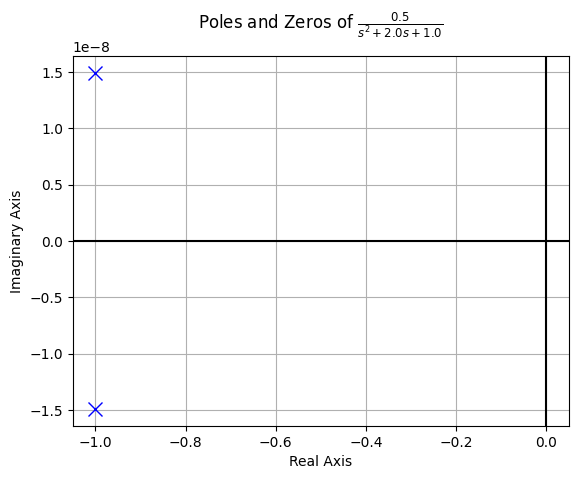

In [ ]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf4 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf4)

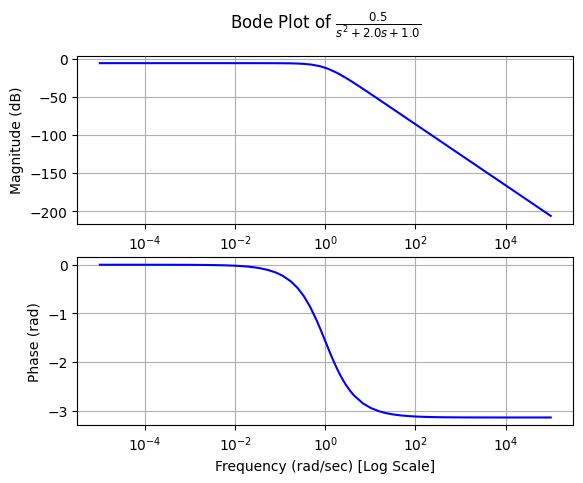

In [ ]:
#para el diagrama de Bode
bode_plot(tf4)

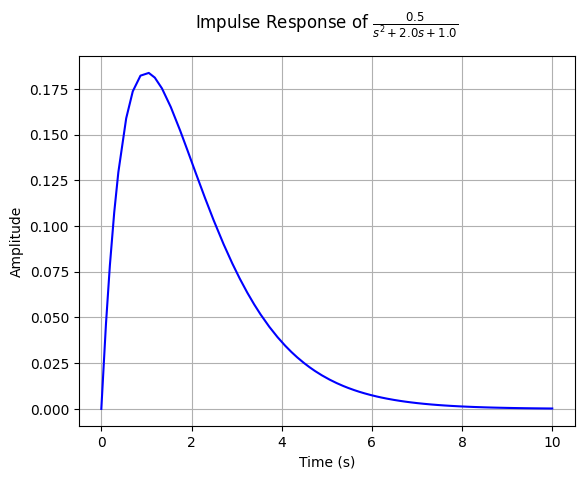

In [ ]:
#Para la respuesta impulso
impulse_response_plot(tf4,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks
# Definir la función de transferencia (sustituye tf4 con tu función)
numerator = [1]
denominator = [2, 4, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

1.207045198818771

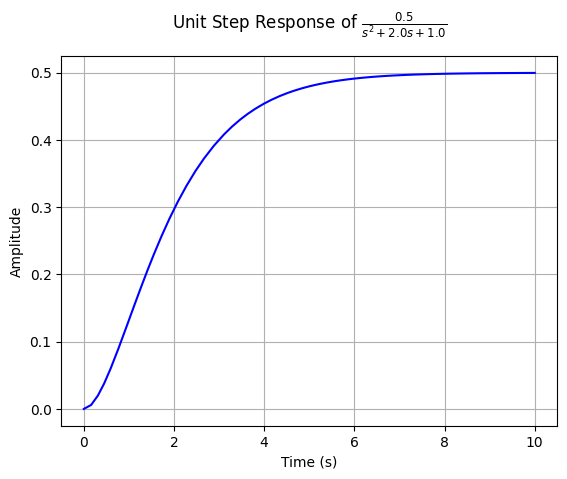

In [ ]:
#Para la respuesta escalón
step_response_plot(tf4,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

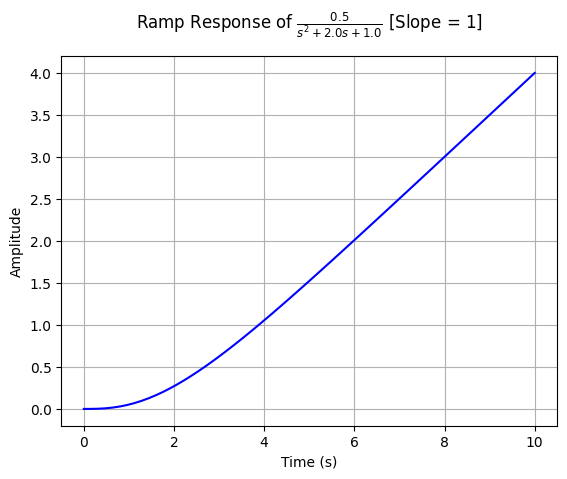

In [ ]:
#Para la respuesta rampa
ramp_response_plot(tf4,upper_limit=10/(xi.subs(mck)*wn.subs(mck)))

#Para el punto número 2 vamos a proceder con descargar nuestra canción favorita para eso reciclamos nuestros códigos anteriores.

In [78]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.2 MB/s eta 0:00:00
  Created wh

In [82]:
#simulación con canción de youtube
#instalar api youtube-dl
import os
import yt_dlp as youtube_dl
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

In [83]:
#descargar canción de mi interés
link_= ["https://www.youtube.com/watch?v=IEvX1i-TDc4"]
name_ = ['Feid']
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

Feid
[youtube] Extracting URL: https://www.youtube.com/watch?v=IEvX1i-TDc4
[youtube] IEvX1i-TDc4: Downloading webpage
[youtube] IEvX1i-TDc4: Downloading ios player API JSON
[youtube] IEvX1i-TDc4: Downloading android player API JSON
[youtube] IEvX1i-TDc4: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=IEvX1i-TDc4
[youtube] IEvX1i-TDc4: Downloading webpage
[youtube] IEvX1i-TDc4: Downloading ios player API JSON
[youtube] IEvX1i-TDc4: Downloading android player API JSON
[youtube] IEvX1i-TDc4: Downloading m3u8 information
[info] IEvX1i-TDc4: Downloading 1 format(s): 251
[download] Feid.mp3 has already been downloaded
[download] 100% of    4.21MiB
Download complete... Feid.mp3


In [84]:
#Convertimos de mp3 a wav
import subprocess

for name in name_:
    subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])

In [85]:
!pip install soundfile #instalamos lo necesario

In [86]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#lee archivos wav
for name in name_:
    nombre_out = "output.wav"
    x, fs = sf.read(name+'.wav')

    print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,name+'.wav'))

Frecuencia de muestreo 48000.00[Hz]
audio Feid.wav


In [87]:
xpro = x.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 45 #tiempo incio a procesar seg
tf = 50 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [88]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

#Comenzamos con las etapas necesarias propuestas en el examen


In [89]:
#Primera parte, el mixer para eso usamos las librerias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

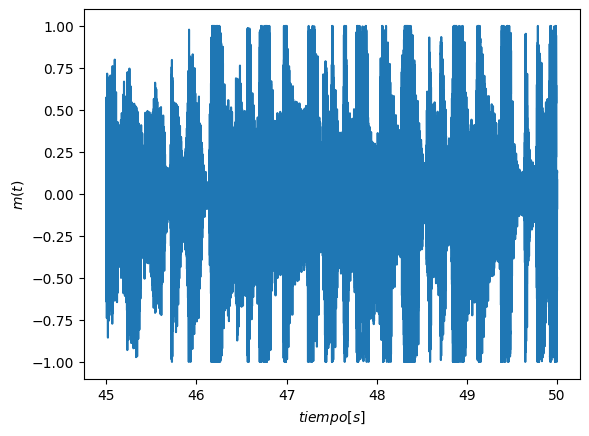

In [90]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.show()

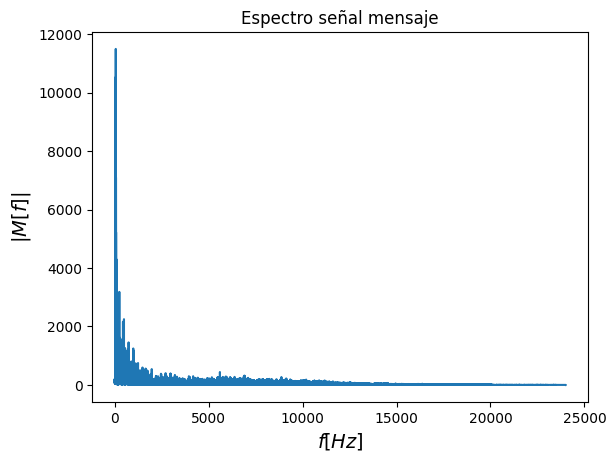

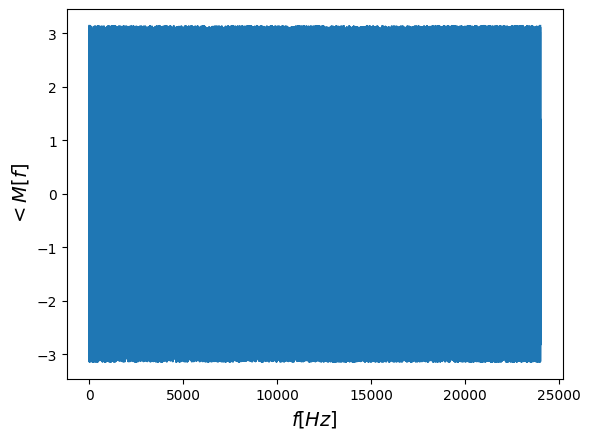

In [91]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

Se fija una $F_o >> F_{max},$ la cual, para nuestro caso:

$$\boxed{F_o = 12000 [Hz]}$$


In [92]:
Fo = 12000 #frecuencia portadora
c = np.cos(2*np.pi*Fo*tt) #portadora

In [93]:
#repoducir portadora
Audio(c,rate=fs)

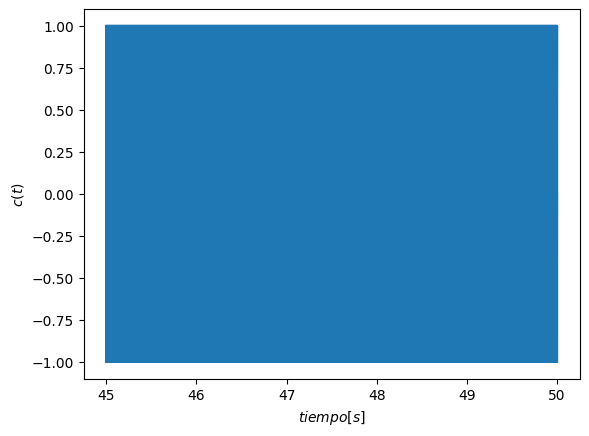

In [94]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

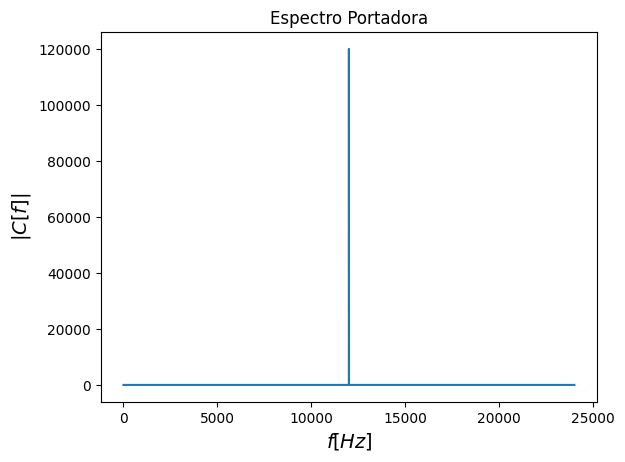

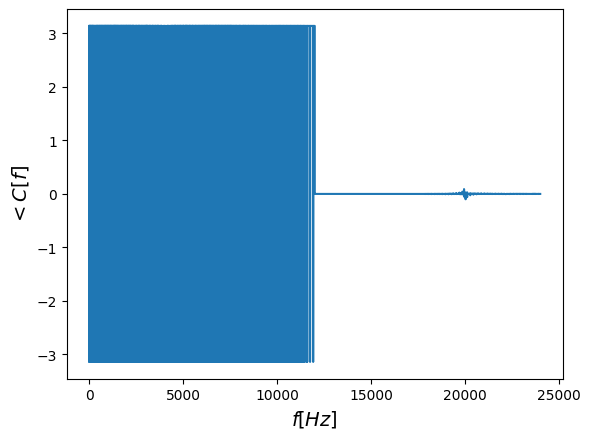

In [95]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [96]:
#señal modulada
A1 = 2
y = A1*m*c #señal modulada en AM

In [97]:
#repoducir modulada
Audio(y,rate=fs)

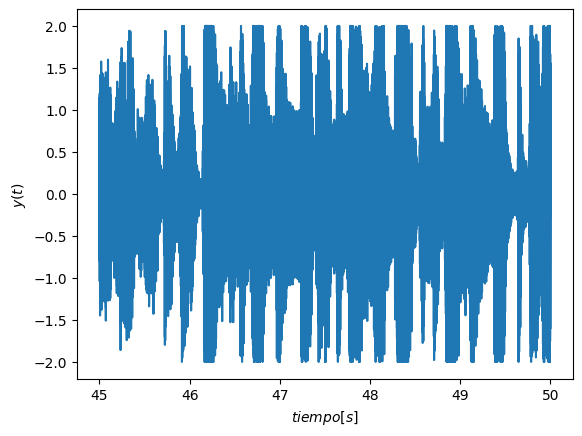

In [98]:
plt.plot(tt,y) #graficar señal modulada en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

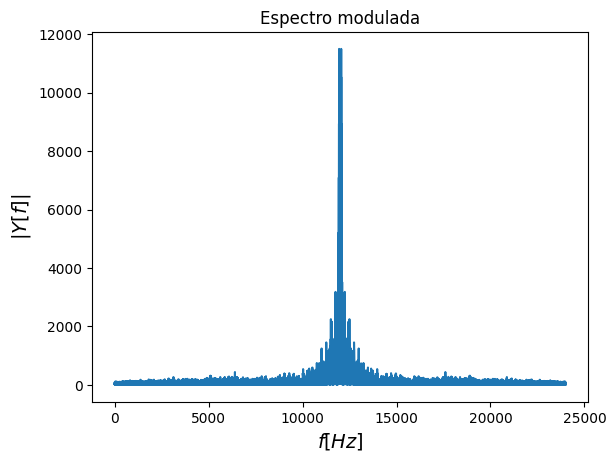

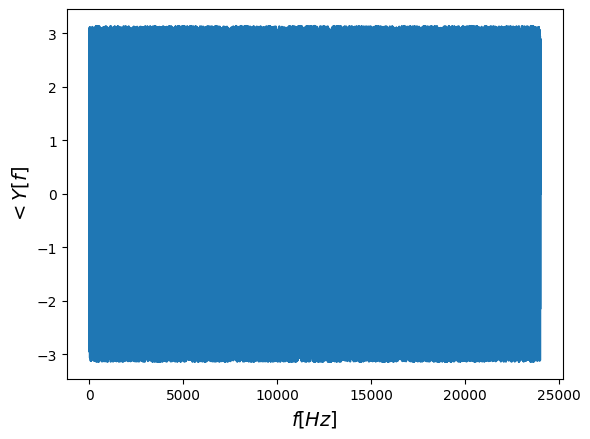

In [99]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

#Procedemos a demodular de la sgte manera

In [101]:
d = y*c #señal demodulada
#repoducimos la señal modulada
Audio(d,rate=fs)

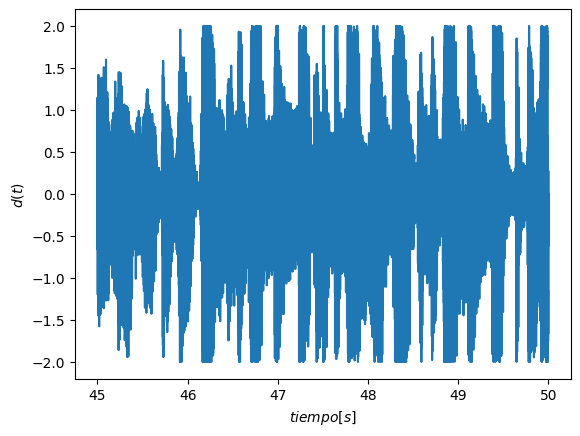

In [102]:
plt.plot(tt,d) #graficar señal demodulada en tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$d(t)$')
plt.show()

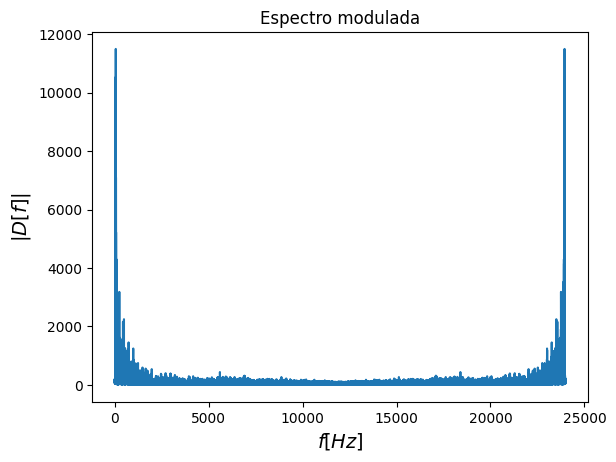

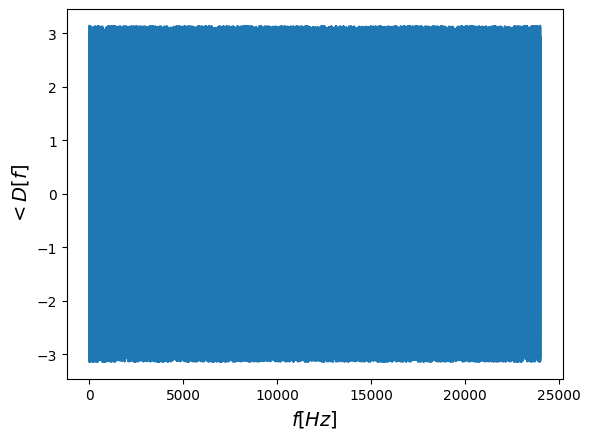

In [103]:
#Fourier señal demodulada
Dw = np.fft.rfft(d) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Dw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|D[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Dw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<D[f]$',fontsize = 14)
plt.show()

#Seguimos con la siguiente etapa la cual es realizar el filtro pasabajas

In [104]:
#Como siempre instalamos las librerias necesarias
from scipy.signal import butter, cheby1, cheby2, bessel,filtfilt, lfilter, freqz_zpk, freqz
import matplotlib.pyplot as plt
import numpy as np

In [105]:
#Para el caso del filtro tipo Butterworth tenemos unas condiciones necesarias
N = 10 #orden el filtro
Wn = 11900 #banda pasante
filt = 'lowpass' #tipo del filtro (pasa-baja, pasa-alta, pasabanda, rechazabanda)
out = 'zpk' #la funcion retorna los polos y ceros junto con la ganancia. Para usar numerador y denominador usar 'ba' junto con freqz
zeros, poles, gain = butter(N, Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs) #Para indicar la longitud usar worN=K

In [106]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()

In [107]:
def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
  ax = plt.gca()

  ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
  ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
  unit_circle = Circle((0,0), radius=1, fill=False,
                        color='black', ls='solid', alpha=0.9)
  ax.add_patch(unit_circle)
  ax.axvline(0, color='0.7')
  ax.axhline(0, color='0.7')

  plt.title(title)
  plt.xlabel(r'Re{$z$}')
  plt.ylabel(r'Im{$z$}')
  plt.axis('equal')
  plt.xlim((-2, 2))
  plt.ylim((-2, 2))
  plt.grid()

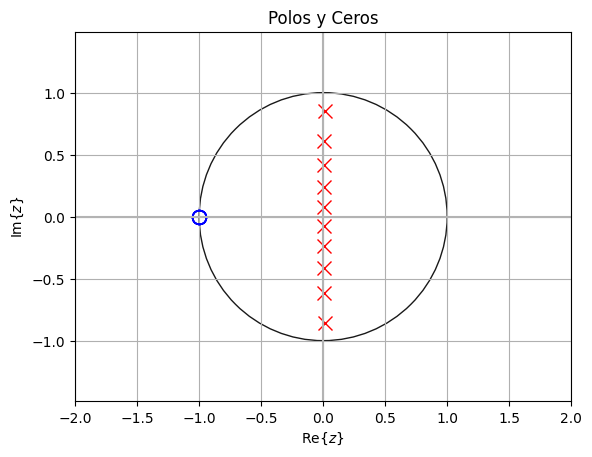

In [109]:
#Graficamos polos y ceros usando
show_zp(zeros, poles, title='Polos y Ceros')

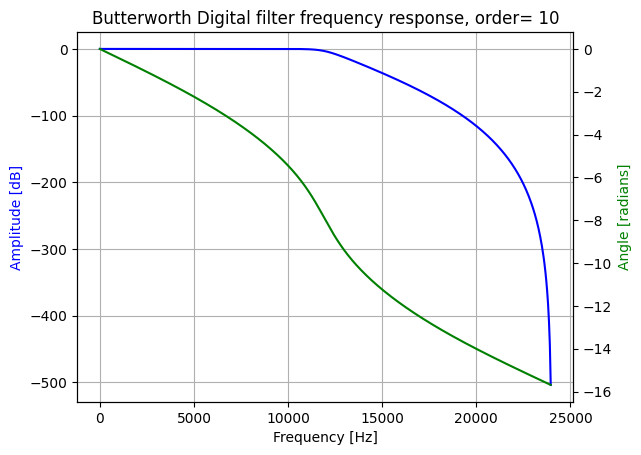

In [110]:
#así, la gráfica de este tipo de filtro seria
plot_freq_response('Butterworth', w, h, N) #gráfica de butterworth

In [112]:
#arrojando el siguiente resultado de audio
out='ba'
num, den = butter(N, Wn, btype=filt, output=out, fs=fs)
xf = lfilter(num, den, d, axis=0)
me = (2/A1)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

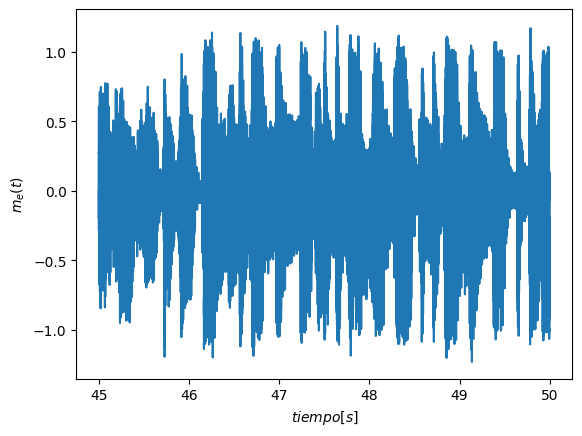

In [114]:
plt.plot(tt,me) #Cuya gráfica es
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

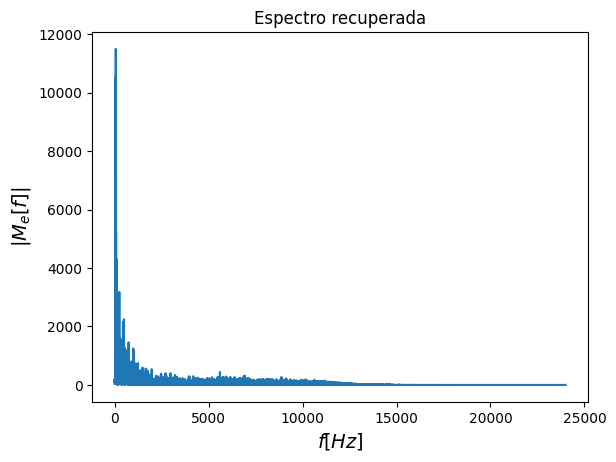

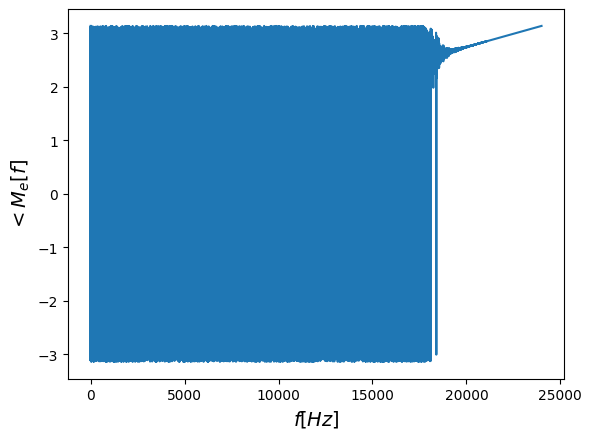

In [115]:
#y cuyo fourier sería
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()

In [116]:
#Ahora para el caso de un filtro tipo Bessel igual tenemos algunas condiciones puestas en el sgt codigo
out = 'ba'
normalization = 'mag' #Ajusta la frecuencia crítica según la respuesta que se desea
num, den = bessel(N, Wn=Wn, btype=filt, norm=normalization, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
w, h = freqz(num, den, fs=fs)

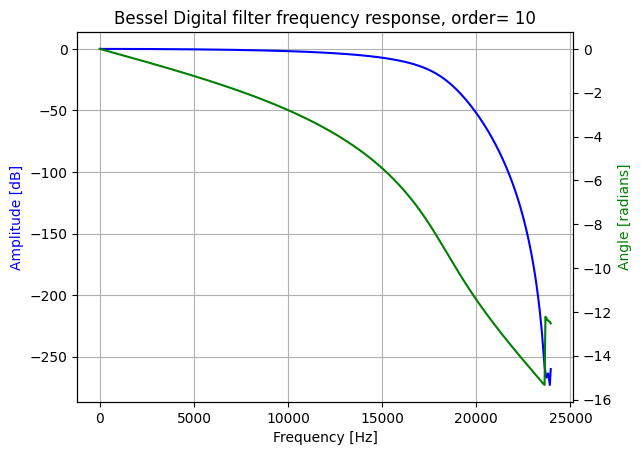

In [117]:
#Graficamos
plot_freq_response('Bessel', w, h, N)

In [118]:
#obteniendo así este tipo de audio
xf = lfilter(num, den, d, axis=0)
me = (2/A1)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

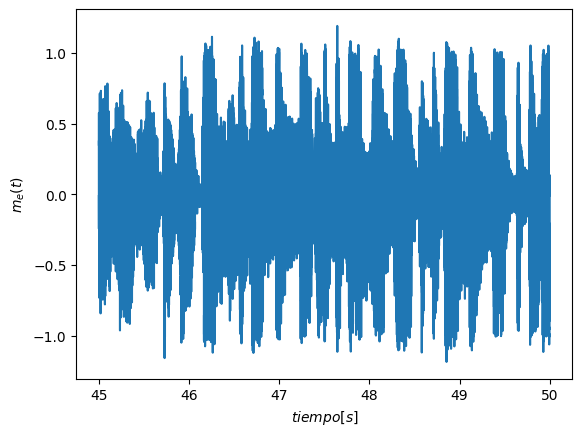

In [119]:
plt.plot(tt,me) #Cuya gráfica es
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

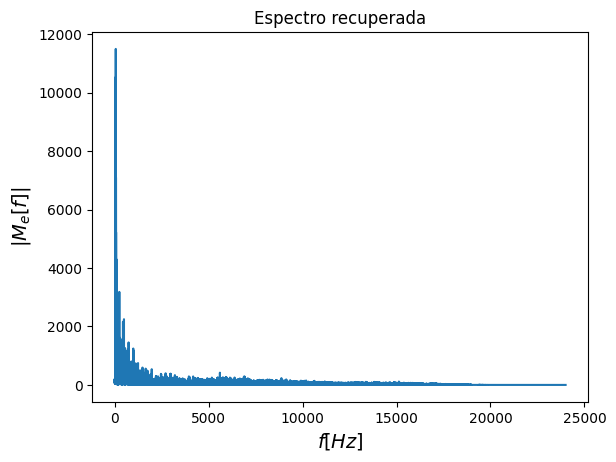

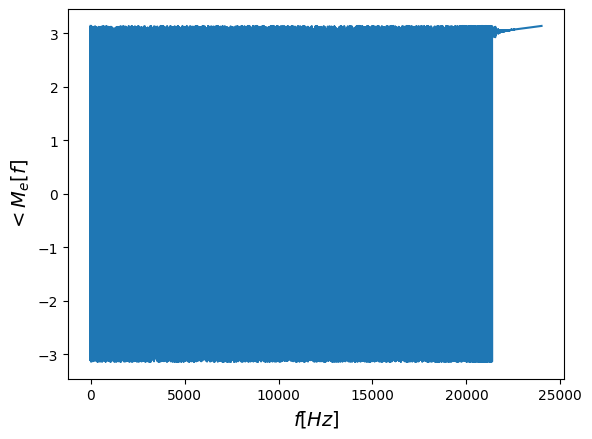

In [120]:
#Y cuya Fourier es
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()

In [122]:
# Para el caso del filtro tipo Chebyshev1 tenemos las conidiciones
N = 4
ripple = 10
out = 'zpk'
zeros, poles, gain = cheby1(N, rp=ripple, Wn=Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs)

b, a = cheby1(N, rp=ripple, Wn=Wn, btype=filt, fs=fs)

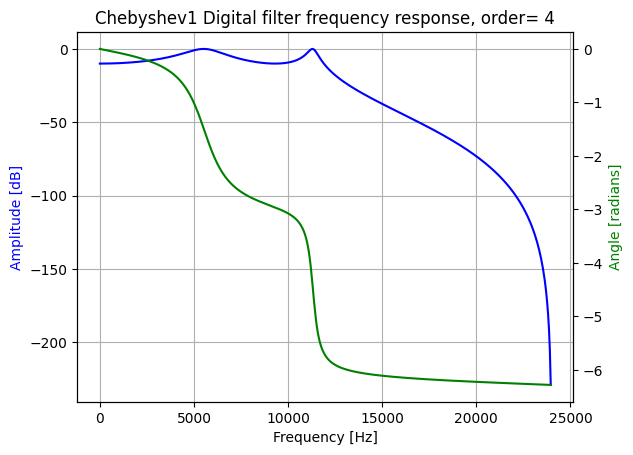

In [123]:
#su grafica es
plot_freq_response('Chebyshev1', w, h, N)

In [124]:
#Y su resultado de audio es
xf = lfilter(b, a, d, axis=0)
me = (2/A1)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

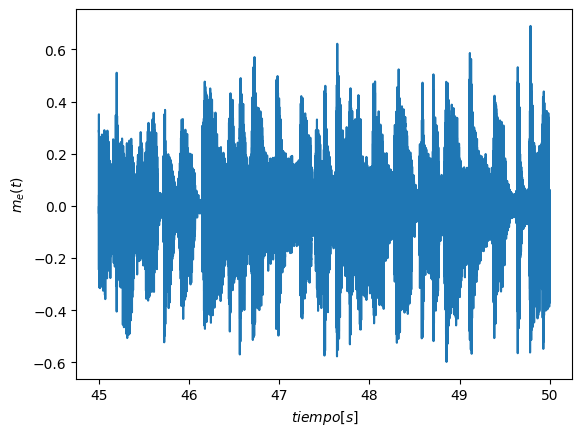

In [125]:
plt.plot(tt,me) #Su gráfica sería
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

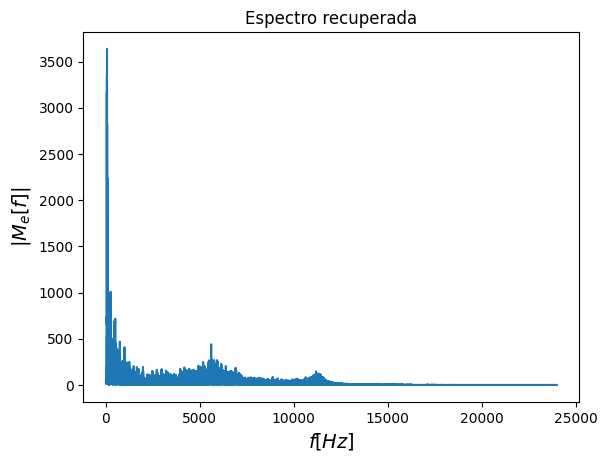

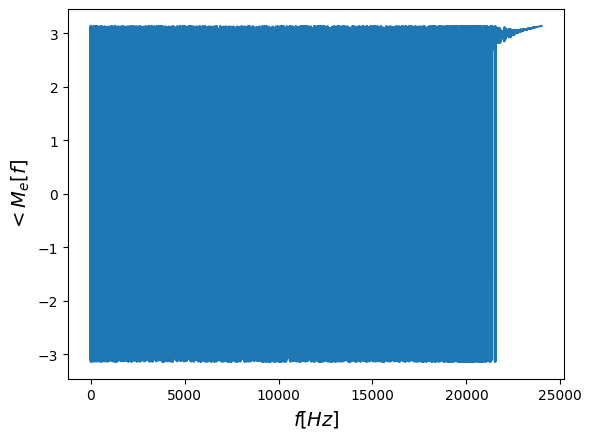

In [126]:
#Su Fourier sería
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()

In [127]:
#Para el caso del filtro Chebyshev2 tenemos las condiciones
N = 4
ripple = 20
out = 'ba' #no regresa los polos y ceros, sino la funcion de transferencia
num, den = cheby2(N, rs=ripple, Wn=Wn, btype=filt, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
w, h = freqz(num, den, fs=fs)

b, a = cheby2(N, rs=ripple, Wn=Wn, btype=filt, fs=fs)

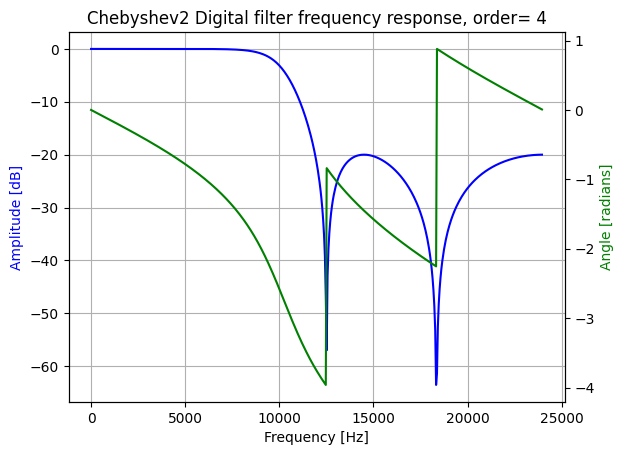

In [128]:
#Siendo su gráfica
plot_freq_response('Chebyshev2', w, h, N)

In [129]:
#Y siendo su audio
xf = lfilter(b, a, d, axis=0)
me = (2/A1)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

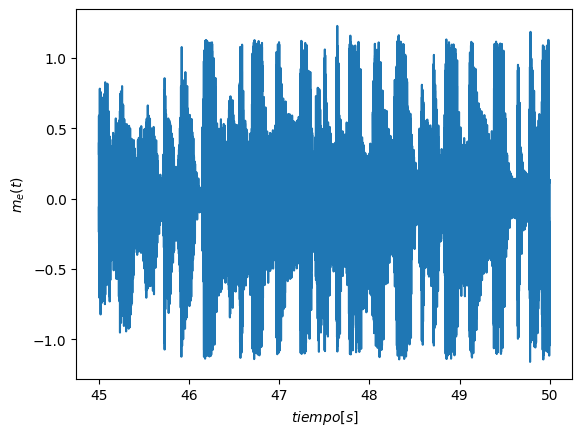

In [130]:
#nos arroja la siguiente gráfica
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

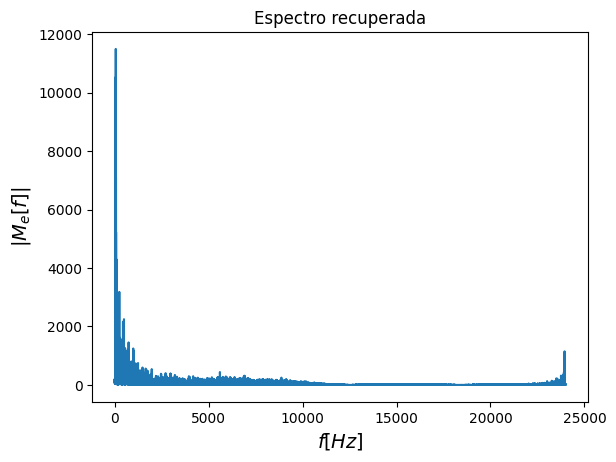

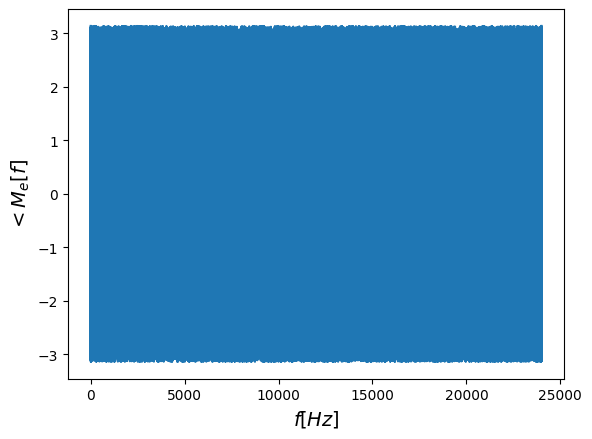

In [131]:
#Y nos arroja su sgte Fourier
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()